# Airline Customer Value Analysis With Clustering Algorithms

### Import Libraries and Settings

In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

pd.options.display.max_columns = 100
pd.set_option('display.max_colwidth', None)

# Requirements
print('numpy version : ',np.__version__)
print('pandas version : ',pd.__version__)
print('seaborn version : ',sns.__version__)

numpy version :  1.24.3
pandas version :  2.0.3
seaborn version :  0.12.2


#### Load Dataset (Jupyter Notebook)

In [2]:
df=pd.read_csv('flight.csv')

#### Load Dataset (Google Colab)

In [3]:
# from google.colab import drive
# drive.mount('/content/drive')

# df = pd.read_csv('flight.csv')

# Initial Data Understanding and Pre-Processing

In [4]:
df.sample(20)

MEMBER_NO    FFP_DATE FIRST_FLIGHT_DATE  GENDER  FFP_TIER  \
62827      30285   4/30/2008         10/1/2013  Female         4   
27228      20261   4/18/2005          6/3/2005    Male         4   
53177      17037    5/7/2011         5/20/2011    Male         4   
24049      58634   5/11/2010         5/11/2010    Male         4   
37751      19823   3/24/2012          8/7/2012  Female         4   
24760      52534   1/31/2013         1/31/2013  Female         4   
33059      54843   7/16/2006         4/11/2010    Male         4   
24812      62004  12/23/2011        12/27/2011    Male         4   
27260       9173    2/1/2011         7/19/2012    Male         4   
7822       28691    2/8/2012         4/19/2012    Male         4   
56386      60205   8/11/2012         8/15/2012    Male         4   
332        28722   4/18/2012         5/16/2012    Male         5   
4247       59123   1/22/2011         1/23/2011    Male         4   
14567      50292   4/20/2011         4/20/2011    Male         4   
49852      48835   12/1/2008         4/29/2010    Male         4   
45597      57004  12/20/2007          3/7/2013    Male         4   
5743       36295   11/8/2011         1/23/2013    Male         5   
55355       1948   2/28/2013          5/5/2013    Male         4   
31439      20197   2/17/2005         3/11/2005    Male         4   
11471      61988  11/24/2012        11/24/2012    Male         4   

          WORK_CITY WORK_PROVINCE WORK_COUNTRY   AGE  LOAD_TIME  FLIGHT_COUNT  \
62827      wuhanshi         hubei           CN  30.0  3/31/2014             2   
27228     guangzhou     guangdong           CN  42.0  3/31/2014            12   
53177       haerbin  heilongjiang           CN  34.0  3/31/2014             5   
24049       beijing       beijing           CN  41.0  3/31/2014             7   
37751       beijing       beijing           CN  32.0  3/31/2014             4   
24760  Namyangju-si   Gyeonggi-do           KR  32.0  3/31/2014             6   
33059     guangzhou     guangdong           CN  38.0  3/31/2014            10   
24812      guanghan  sichuansheng           CN  40.0  3/31/2014             5   
27260      shanghai      shanghai           CN  61.0  3/31/2014             6   
7822      guangzhou     guangdong           CN  45.0  3/31/2014            21   
56386     guangzhou     guangdong           CN  32.0  3/31/2014             2   
332             NaN      shanghai           CN  55.0  3/31/2014           132   
4247       shanghai      shanghai           CN  36.0  3/31/2014            19   
14567      shenzhen     guangdong           CN  41.0  3/31/2014            18   
49852       nanning       guangxi           CN  39.0  3/31/2014             5   
45597     guangzhou     guangdong           CN  37.0  3/31/2014             9   
5743          fanyu     guangdong           CN  28.0  3/31/2014            22   
55355        zhuhai     guangdong           CN  33.0  3/31/2014             4   
31439       shantou     guangdong           CN  55.0  3/31/2014            12   
11471      shanghai      shanghai           CN  40.0  3/31/2014            19   

       BP_SUM  SUM_YR_1  SUM_YR_2  SEG_KM_SUM LAST_FLIGHT_DATE  LAST_TO_END  \
62827       0       0.0     491.0        1825         2/5/2014           56   
27228    7037    5348.0    3025.0       12046        12/9/2013          114   
53177    1447     384.0    1786.0        5050         3/1/2014           31   
24049    8923    1210.0    7501.0       11898        11/6/2013          147   
37751    4772    3860.0       0.0        5180       11/30/2012          488   
24760    9534    6780.0    1954.0       12900        4/14/2013          353   
33059    5916    2437.0    4070.0       10506       12/26/2013           97   
24812    9380    8405.0       0.0       11730       10/13/2012          536   
27260    7841    1890.0    1720.0       10337        2/24/2014           37   
7822    19714   14763.0    9095.0       33278        1/24/2014           68   
56386  

There are some weird values in these columns, we will see the details later down below

In [5]:
# Initial data transformation :  converting column name to lowercase
df.columns = df.columns.str.lower()

In [6]:
#Checking dataframe information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62988 entries, 0 to 62987
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   member_no          62988 non-null  int64  
 1   ffp_date           62988 non-null  object 
 2   first_flight_date  62988 non-null  object 
 3   gender             62985 non-null  object 
 4   ffp_tier           62988 non-null  int64  
 5   work_city          60719 non-null  object 
 6   work_province      59740 non-null  object 
 7   work_country       62962 non-null  object 
 8   age                62568 non-null  float64
 9   load_time          62988 non-null  object 
 10  flight_count       62988 non-null  int64  
 11  bp_sum             62988 non-null  int64  
 12  sum_yr_1           62437 non-null  float64
 13  sum_yr_2           62850 non-null  float64
 14  seg_km_sum         62988 non-null  int64  
 15  last_flight_date   62988 non-null  object 
 16  last_to_end        629

<b>Features Description</b>

 <pre>
member_no: Member ID
ffp_date: Frequent Flyer Program Join Date
first_flight_date: First Flight Date
gender: Gender
ffp_tier: Frequent Flyer Program Tier
work_city: Work City
work_province: Work Proviince
work_country: Work Country
age: Customer Age
load_time: Date data was taken
flight_count: Number of customer flights
bp_sum: Total basic integral
sum_yr_1: Fare Revenue
sum_yr_2: Votes Prices
seg_km_sum: Total distance (km) flights that have been done
last_flight_date: Last Flight Date
last_to_end: last flight time to last flight order interval
avg_internal: Average time distance
max_interval: Maximum time distance
exchange_count: Number of redemptions
avg_discount: The average discount that customers get
points_sum: The number of points earned by the customer
point_notflight: Points not used by members

Some of the data type are wrong here like features that have date values which are ffp_date, first_flight_date, last_flight_date, load_time, but the data type is assigned as object. There are also features that should have int values but are assigned as float like age, sum_yr_1, sum_yr_2. We will need to convert them later if needed

Now we will check some of the weird values in the dataset that we found before

In [7]:
#Check inconsistent values in work_city feature
for values in df['work_city'].unique()[:30]: #before showing only 30 we tried it for all data values
    print(values)

.
nan
Los Angeles
guiyang
guangzhou
wulumuqishi
wenzhoushi
DRANCY
wenzhou
PARIS
beijing
SAN MARINO
shenzhen
BOWLAND HEIGHTS
wulumuqi
dongguan
VECHEL
zhanjiang
guangzhoushi
Paris
UPLAND
fanyu
changsha
SUMIDA-KU
HK
PUCHONG
hangzhoushi
TORRANCE
chengdu
shishi


In [8]:
#Check inconsistent values in work_province feature
for values in df['work_province'].unique()[:30]: #before showing only 30 we tried it for all data values
    print(values)

beijing
CA
guizhou
guangdong
xinjiang
zhejiang
nan
PARIS
.
CALIFORNIA
NORD BRABANT
FRANCE
guangdongsheng
hunan
TOKYO-TO
HK
Selangor Darul Ehsan
sichuan
fujian
VIC
shanghai
Noord-Holland
FR
zhongqing
guangxi
CA91030
ZUID HOLLAND
xianggang
jilin
ANDE


As we can see that both work_city and work_province feature values are very dirty and non-consistent, some of the values even only have symbols like '?' and '--' where in city and province this does not make any sense at all. There is a high chance we will avoid using these features at all in our clustering analysis

In [9]:
df.columns

Index(['member_no', 'ffp_date', 'first_flight_date', 'gender', 'ffp_tier',
       'work_city', 'work_province', 'work_country', 'age', 'load_time',
       'flight_count', 'bp_sum', 'sum_yr_1', 'sum_yr_2', 'seg_km_sum',
       'last_flight_date', 'last_to_end', 'avg_interval', 'max_interval',
       'exchange_count', 'avg_discount', 'points_sum', 'point_notflight'],
      dtype='object')

In [10]:
#Check format values in date features
for values in df['first_flight_date'].unique()[:30]: # check also for other date features
    print(values)

12/24/2008
8/3/2007
8/30/2007
8/23/2008
4/15/2009
9/29/2009
3/29/2006
4/9/2010
7/1/2011
7/5/2010
11/20/2010
12/2/2004
11/18/2007
10/27/2007
2/1/2010
4/5/2008
8/20/2010
2/23/2011
2/22/2007
10/22/2011
11/21/2008
6/9/2011
4/10/2005
4/13/2010
3/1/2010
11/1/2010
3/23/2007
3/17/2005
1/8/2006
6/27/2008


All of the date features have the original format of MM/DD/YY, we will change it later to YY-MM-DD with pd.to_datetime() method

In [11]:
#Check values in load_time feature
df['load_time'].unique()

array(['3/31/2014'], dtype=object)

The feature load_time which from the definition is the date where data was taken only have 1 value that is 3/31/2014; and this actually does not have any meaning to our clustering analysis here so later we will drop or does not use this feature at all

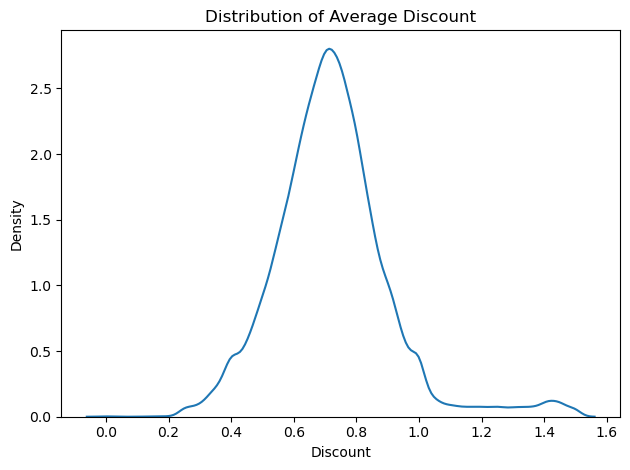

In [12]:
#Check values in avg_discount feature
sns.kdeplot(x = 'avg_discount', data=df)
plt.title("Distribution of Average Discount")
plt.ylabel("Density")
plt.xlabel("Discount")
plt.tight_layout()

- The distribution of avg_discount is kinda weird here. From the definition it says that avg_discount is the average discount that customers get, while from the values range this should be in percentage, then avg_discount that > 1 (100%) is not valid making this information is hard to interpret because the scaling problem from the beginning, will probably not use this feature either.
- We could however filter this using only data with <= 1 discount (with the code down below), but this move is not recommended since we doesn't know the details about what the problem here, whether it's the only scaling problem and it actually interpreted in another way or the system that gather the data.

In [13]:
# #Filter the avg_discount more than 1
# df = df[df['avg_discount']<=1]

In [14]:
#Checking amount of duplicated values
df.duplicated().sum()

0

In [15]:
#Checking missing values
df.isnull().sum()

member_no               0
ffp_date                0
first_flight_date       0
gender                  3
ffp_tier                0
work_city            2269
work_province        3248
work_country           26
age                   420
load_time               0
flight_count            0
bp_sum                  0
sum_yr_1              551
sum_yr_2              138
seg_km_sum              0
last_flight_date        0
last_to_end             0
avg_interval            0
max_interval            0
exchange_count          0
avg_discount            0
points_sum              0
point_notflight         0
dtype: int64

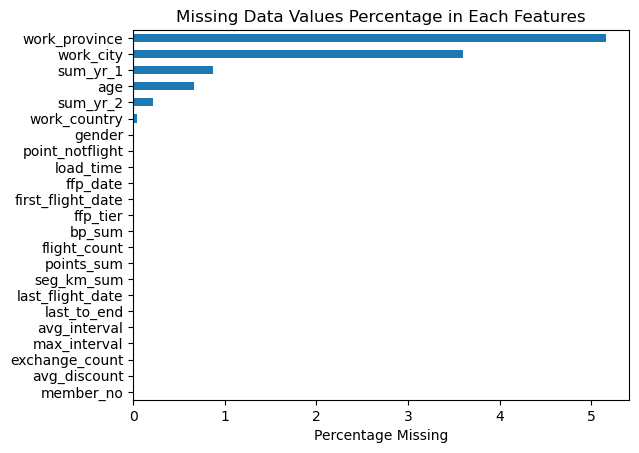

In [16]:
#Visualize percentage of missing values in each features
df_percentage_missing = df.isna().sum()/df.shape[0] * 100
df_percentage_missing = df_percentage_missing.sort_values()
df_percentage_missing.plot(kind='barh')
plt.title('Missing Data Values Percentage in Each Features')
# plt.ylabel('Features')
plt.xlabel('Percentage Missing')
plt.show()

In [17]:
#Additional to missing features representation
df_percentage_missing = df_percentage_missing[df_percentage_missing > 0]
df_percentage_missing = df_percentage_missing.sort_values(ascending=False)
df_percentage_missing

work_province    5.156538
work_city        3.602273
sum_yr_1         0.874770
age              0.666794
sum_yr_2         0.219089
work_country     0.041278
gender           0.004763
dtype: float64

Since the amount of missing values more dominant in the work_province and work_city features which is actually got other problem other than missing values but also unrelevant values, we will ignore these two columns in the drop missing values procedure, since we wont be using them

In [18]:
#Count the total of missing values that will be drop relative to entire data
df[['work_province', 'work_country', 'work_city', 'age', 'sum_yr_1', 'sum_yr_2', 'gender']].isnull().sum().sum()/df.shape[0]*100

10.565504540547407

In [19]:
#Drop missing values from specific columns
df = df.dropna(subset=['work_province', 'work_country', 'work_city', 'age', 'sum_yr_1', 'sum_yr_2', 'gender'])

In [20]:
#Checking the shape of our new dataframe after drop missing values
df.shape

(58255, 23)

We will also reduce the dimension to 22 by dropping the member_no feature because it has no meaning in this clustering case

In [21]:
df.drop(columns='member_no', inplace=True)

Before we change the data type of date features, there is a problem that i just found when i ran the code below. That is in last_flight_date there is a date values of 2014/2/29  0:00:00 which raise an ValueError saying it doesn't match format "%m/%d/%Y", we will handle that first

In [22]:
#Checking data for that condition
df[df['last_flight_date'] == '2014/2/29  0:00:00']

ffp_date first_flight_date  gender  ffp_tier  work_city  \
248     6/17/2007         6/17/2007  Female         6  guangzhou   
447     8/26/2009         4/29/2010    Male         5    haerbin   
473    11/10/2006         1/26/2007    Male         5          .   
832     7/13/2005          8/6/2005    Male         5  guangzhou   
1051    5/24/2006         4/21/2007    Male         5      wuhan   
...           ...               ...     ...       ...        ...   
61388    4/8/2009         4/11/2009    Male         4   wulumuqi   
61539   1/11/2013         7/10/2013    Male         4  dalianshi   
61871   7/26/2009         7/26/2009    Male         4    tianjin   
61909   4/11/2011         4/20/2011    Male         4  guangzhou   
62721  10/31/2007         3/13/2008    Male         4     foshan   

      work_province work_country   age  load_time  flight_count  bp_sum  \
248       guangdong           CN  46.0  3/31/2014            53  116307   
447    heilongjiang           CN  70.0  3/31/2014            31   96739   
473         beijing           CN  39.0  3/31/2014            49   84754   
832       guangdong           CN  40.0  3/31/2014            80   61418   
1051          hubei           CN  50.0  3/31/2014            27   65918   
...             ...          ...   ...        ...           ...     ...   
61388      xinjiang           CN  45.0  3/31/2014             2     680   
61539      liaoning           CN  23.0  3/31/2014             3       0   
61871       tianjin           CN  37.0  3/31/2014             2     854   
61909     guangdong           CN  34.0  3/31/2014             2     838   
62721     guangdong           CN  42.0  3/31/2014             2     276   

       sum_yr_1  sum_yr_2  seg_km_sum    last_flight_date  last_to_end  \
248     30884.0   70845.0       85000  2014/2/29  0:00:00           32   
447     26510.0   46323.0       69453  2014/2/29  0:00:00           32   
473     28693.0   30580.0       65717  2014/2/29  0:00:00           32   
832     32900.0   36417.0      114222  2014/2/29  0:00:00           32   
1051    23892.0   35680.0       49859  2014/2/29  0:00:00           32   
...         ...       ...         ...                 ...          ...   
61388       0.0     783.0        3243  2014/2/29  0:00:00           32   
61539       0.0     955.0        3513  2014/2/29  0:00:00           32   
61871       0.0     966.0        1298  2014/2/29  0:00:00           32   
61909       0.0     853.0        2595  2014/2/29  0:00:00           32   
62721       0.0     688.0        1199  2014/2/29  0:00:00           32   

       avg_interval  max_interval  exchange_count  avg_discount  points_sum  \
248       13.250000            57               0      1.373478      132653   
447       22.766667            75               6      1.375395      101413   
473       14.250000            65               1      1.425974       93153   
832        8.696203            34               2      0.664970       91476   
1051      19.115385            72               4      1.388584       69047   
...             ...           ...             ...           ...         ...   
61388    459.000000           459               1      0.308511        2180   
61539    117.000000           211               0      0.276667           0   
61871    135.000000           135               0      0.690000        1094   
61909      1.000000             1               0      0.340000        3356   
62721     78.000000            78               0      0.489525         276   

       point_notflight  
248                  4  
447                  7  
473                  8  
832                 15  
1051                 4  
...                ...  
61388                2  
61539                0  
61871                1  
61909               19  
62721                0  

[395 rows x 22 columns]

In [23]:
#Handling data for that condition by changing it to the day before (Feb 28th)
df['last_flight_date'] = df['last_flight_date'].replace('2014/2/29  0:00:00', '2/28/2014')

In [24]:
#Convert object to datetime
df['ffp_date'] = pd.to_datetime(df['ffp_date'])
df['load_time'] = pd.to_datetime(df['load_time'])
df['first_flight_date'] = pd.to_datetime(df['first_flight_date'])
df['last_flight_date'] = pd.to_datetime(df['last_flight_date'])

#Convert float to int
df[['age', 'sum_yr_1', 'sum_yr_2']] = df[['age', 'sum_yr_1', 'sum_yr_2']].astype(int)

In [25]:
#Check dataframe after initial cleaning
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 58255 entries, 0 to 62986
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   ffp_date           58255 non-null  datetime64[ns]
 1   first_flight_date  58255 non-null  datetime64[ns]
 2   gender             58255 non-null  object        
 3   ffp_tier           58255 non-null  int64         
 4   work_city          58255 non-null  object        
 5   work_province      58255 non-null  object        
 6   work_country       58255 non-null  object        
 7   age                58255 non-null  int32         
 8   load_time          58255 non-null  datetime64[ns]
 9   flight_count       58255 non-null  int64         
 10  bp_sum             58255 non-null  int64         
 11  sum_yr_1           58255 non-null  int32         
 12  sum_yr_2           58255 non-null  int32         
 13  seg_km_sum         58255 non-null  int64         
 14  last_flight

Now all features have the right data type, so that in the future when we want to do further analysis we can broad the scope using more features

# Descriptive Statistics

In [26]:
#See values of features that have date values
df.select_dtypes(include='datetime64[ns]')

ffp_date first_flight_date  load_time last_flight_date
0     2006-11-02        2008-12-24 2014-03-31       2014-03-31
2     2007-02-01        2007-08-30 2014-03-31       2014-03-21
3     2008-08-22        2008-08-23 2014-03-31       2013-12-26
4     2009-04-10        2009-04-15 2014-03-31       2014-03-27
5     2008-02-10        2009-09-29 2014-03-31       2014-01-13
...          ...               ...        ...              ...
62982 2013-01-20        2013-01-20 2014-03-31       2013-01-20
62983 2011-05-20        2013-06-05 2014-03-31       2013-06-09
62984 2010-03-08        2013-09-14 2014-03-31       2014-01-03
62985 2006-03-30        2006-12-02 2014-03-31       2014-03-03
62986 2013-02-06        2013-02-14 2014-03-31       2013-02-26

[58255 rows x 4 columns]

In [27]:
#Grouping columns based on their types

nums = ['ffp_tier', 'age', 'flight_count', 'bp_sum', 'sum_yr_1', 'sum_yr_2', 'seg_km_sum', 'last_to_end', 'avg_interval', 'max_interval', 'exchange_count', 'avg_discount',  'points_sum', 'point_notflight']
cats = ['gender', 'work_city', 'work_province', 'work_country']
dates = ['ffp_date', 'first_flight_date', 'load_time', 'last_flight_date']

In [28]:
#Describe numerical columns
df[nums].describe().transpose()

count          mean           std    min          25%  \
ffp_tier         58255.0      4.104849      0.378182    4.0     4.000000   
age              58255.0     42.228736      9.761965    6.0    35.000000   
flight_count     58255.0     12.067634     14.236472    2.0     3.000000   
bp_sum           58255.0  11066.303682  16283.209178    0.0  2608.000000   
sum_yr_1         58255.0   5366.827963   8103.595049    0.0  1016.000000   
sum_yr_2         58255.0   5694.530650   8710.724917    0.0   846.000000   
seg_km_sum       58255.0  17353.000910  20969.886756  368.0  4904.000000   
last_to_end      58255.0    171.255309    180.560120    1.0    28.000000   
avg_interval     58255.0     67.937285     77.449058    0.0    23.700000   
max_interval     58255.0    167.349206    122.890446    0.0    81.000000   
exchange_count   58255.0      0.328384      1.148485    0.0     0.000000   
avg_discount     58255.0      0.720627      0.183895    0.0     0.612155   
points_sum       58255.0  12742.648820  20606.104272    0.0  2872.500000   
point_notflight  58255.0      2.820548      7.500252    0.0     0.000000   

                          50%           75%       max  
ffp_tier             4.000000      4.000000       6.0  
age                 41.000000     48.000000     110.0  
flight_count         7.000000     15.000000     213.0  
bp_sum            5832.000000  13022.000000  505308.0  
sum_yr_1          2808.000000   6591.500000  239560.0  
sum_yr_2          2846.000000   6958.000000  234188.0  
seg_km_sum       10237.000000  21571.500000  580717.0  
last_to_end        104.000000    258.000000     731.0  
avg_interval        44.833333     82.000000     728.0  
max_interval       144.000000    228.000000     728.0  
exchange_count       0.000000      0.000000      46.0  
avg_discount         0.711468      0.808159       1.5  
points_sum        6487.000000  14527.000000  985572.0  
point_notflight      0.000000      1.000000     140.0

In [29]:
#Describe categorical columns
df[cats].describe().transpose()

count unique        top   freq
gender         58255      2       Male  44434
work_city      58255   2944  guangzhou   9283
work_province  58255   1127  guangdong  17329
work_country   58255    105         CN  54954

In [30]:
#Describe date columns (the important ones in this case are probably min and max value)
df[dates].describe().transpose()

count                          mean        min        25%  \
ffp_date           58255 2010-03-30 17:00:47.522101248 2004-11-01 2008-05-05   
first_flight_date  58255 2010-09-23 19:34:01.472834816 1905-12-31 2009-01-22   
load_time          58255 2014-03-31 00:00:00.000000000 2014-03-31 2014-03-31   
last_flight_date   58255 2013-10-12 11:17:59.412925952 2012-04-01 2013-07-18   

                         50%        75%        max  
ffp_date          2010-11-17 2012-04-09 2013-03-31  
first_flight_date 2011-05-24 2012-08-04 2015-04-03  
load_time         2014-03-31 2014-03-31 2014-03-31  
last_flight_date  2013-12-19 2014-03-04 2014-03-31

In [31]:
#Categorical feature value counts
for col in cats :
    print(df[col].value_counts())
    print()

gender
Male      44434
Female    13821
Name: count, dtype: int64

work_city
guangzhou          9283
beijing            7547
shanghai           4611
shenzhen           3551
dalian             1915
                   ... 
gujranwala            1
xiaomu                1
Endeavour Hills       1
jiangdushi            1
lingshui              1
Name: count, Length: 2944, dtype: int64

work_province
guangdong           17329
beijing              7708
shanghai             4645
liaoning             4048
xinjiang             2431
                    ...  
YAMANASHI-PREF          1
KYORO-PREFECTURE        1
TIANJIN                 1
Jiangsu                 1
JAWATIMUR               1
Name: count, Length: 1127, dtype: int64

work_country
CN    54954
KR      715
JP      713
US      476
HK      371
      ...  
AB        1
CD        1
NO        1
CM        1
CC        1
Name: count, Length: 105, dtype: int64



# Univariate Analysis

## Numerical Columns

In [32]:
len(df[nums].columns)

14

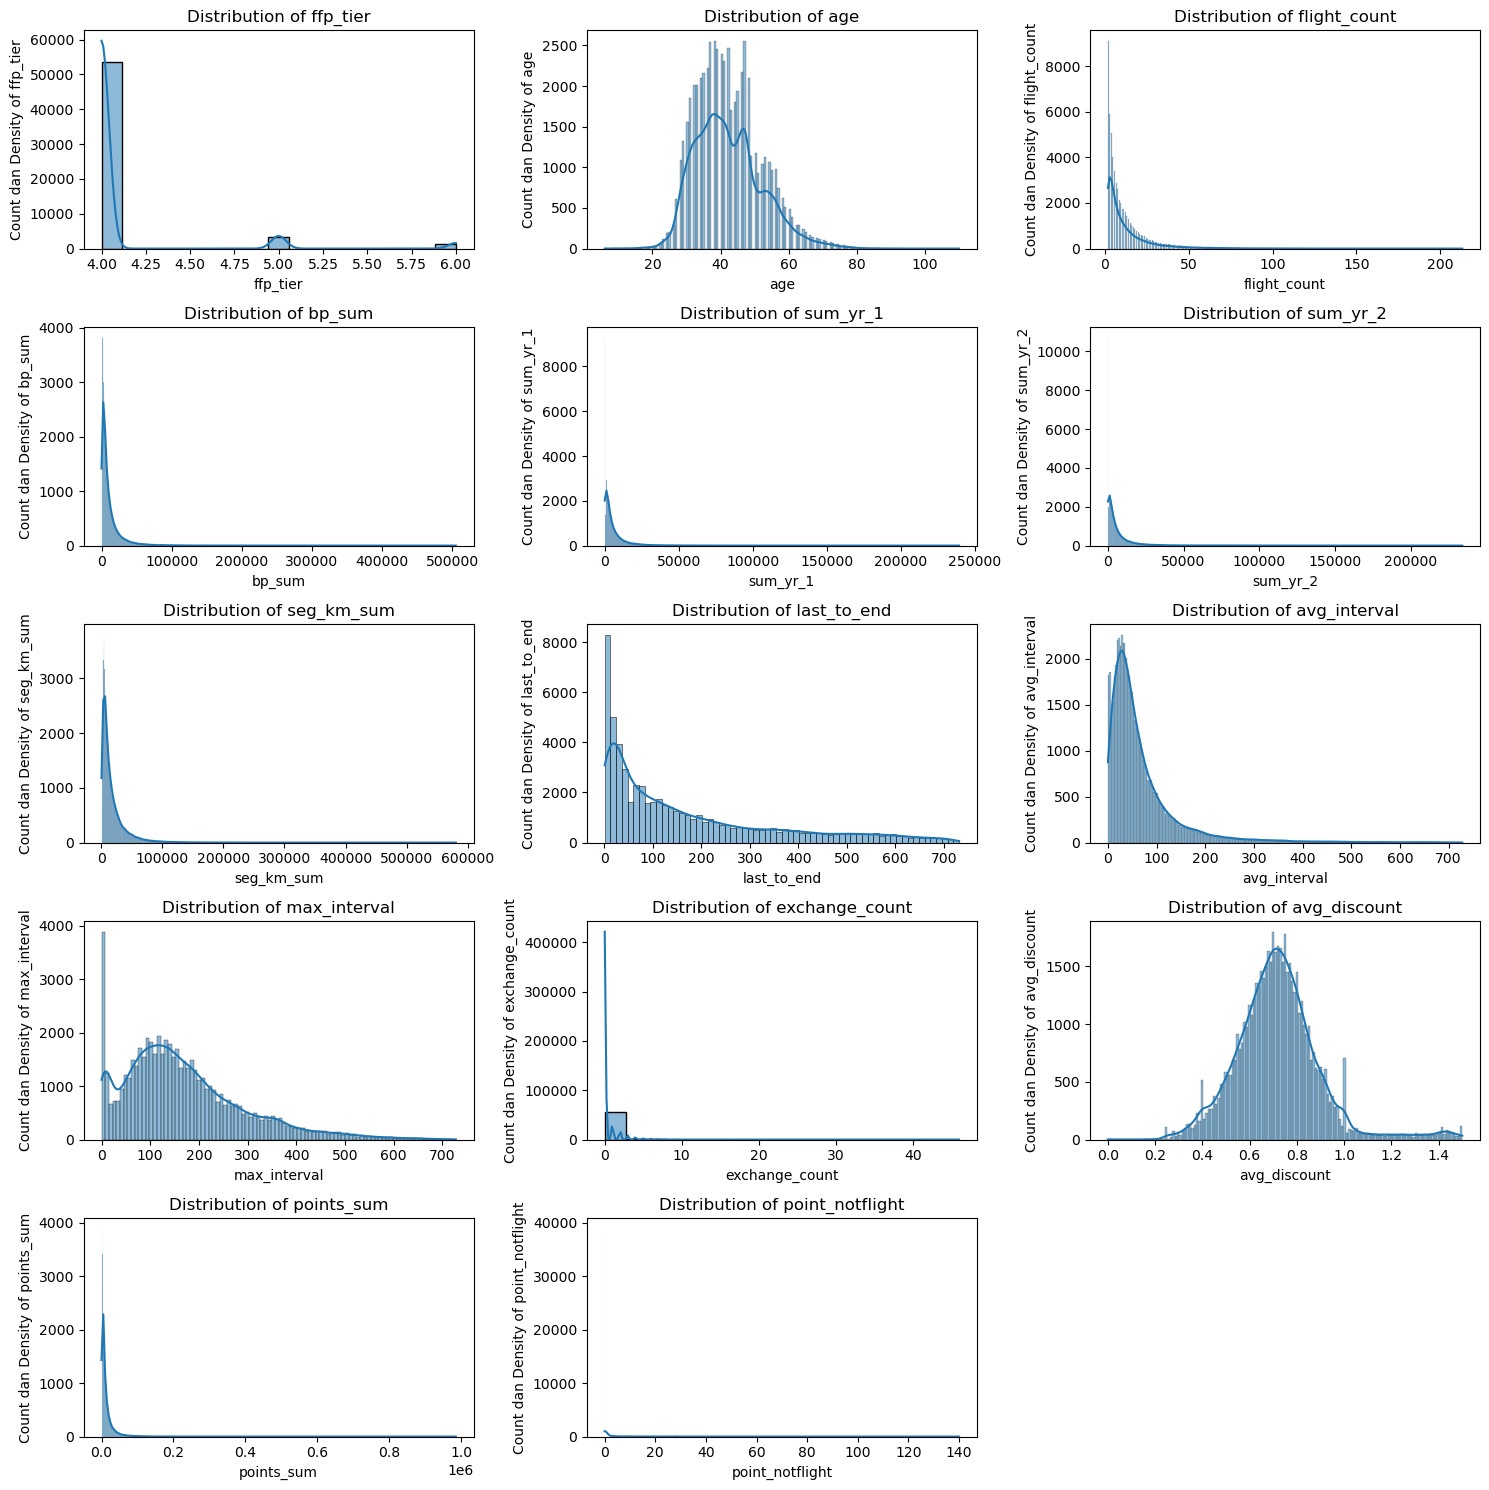

In [33]:
# Hisplot with kde
fig, axes = plt.subplots(nrows=5, ncols=3, figsize=(15, 15))
axes = axes.flatten()

for i in range(len(nums)) :
  sns.histplot(data = df, ax=axes[i], x=nums[i], kde=True)
  axes[i].set_title(f'Distribution of {nums[i]}')
  axes[i].set_ylabel(f'Count dan Density of {nums[i]}')
  axes[i].set_xlabel(f'{nums[i]}')

# Remove the last subplot if there are fewer features than subplots
if len(nums) < len(axes):
    axes[len(nums)].remove()

plt.tight_layout()

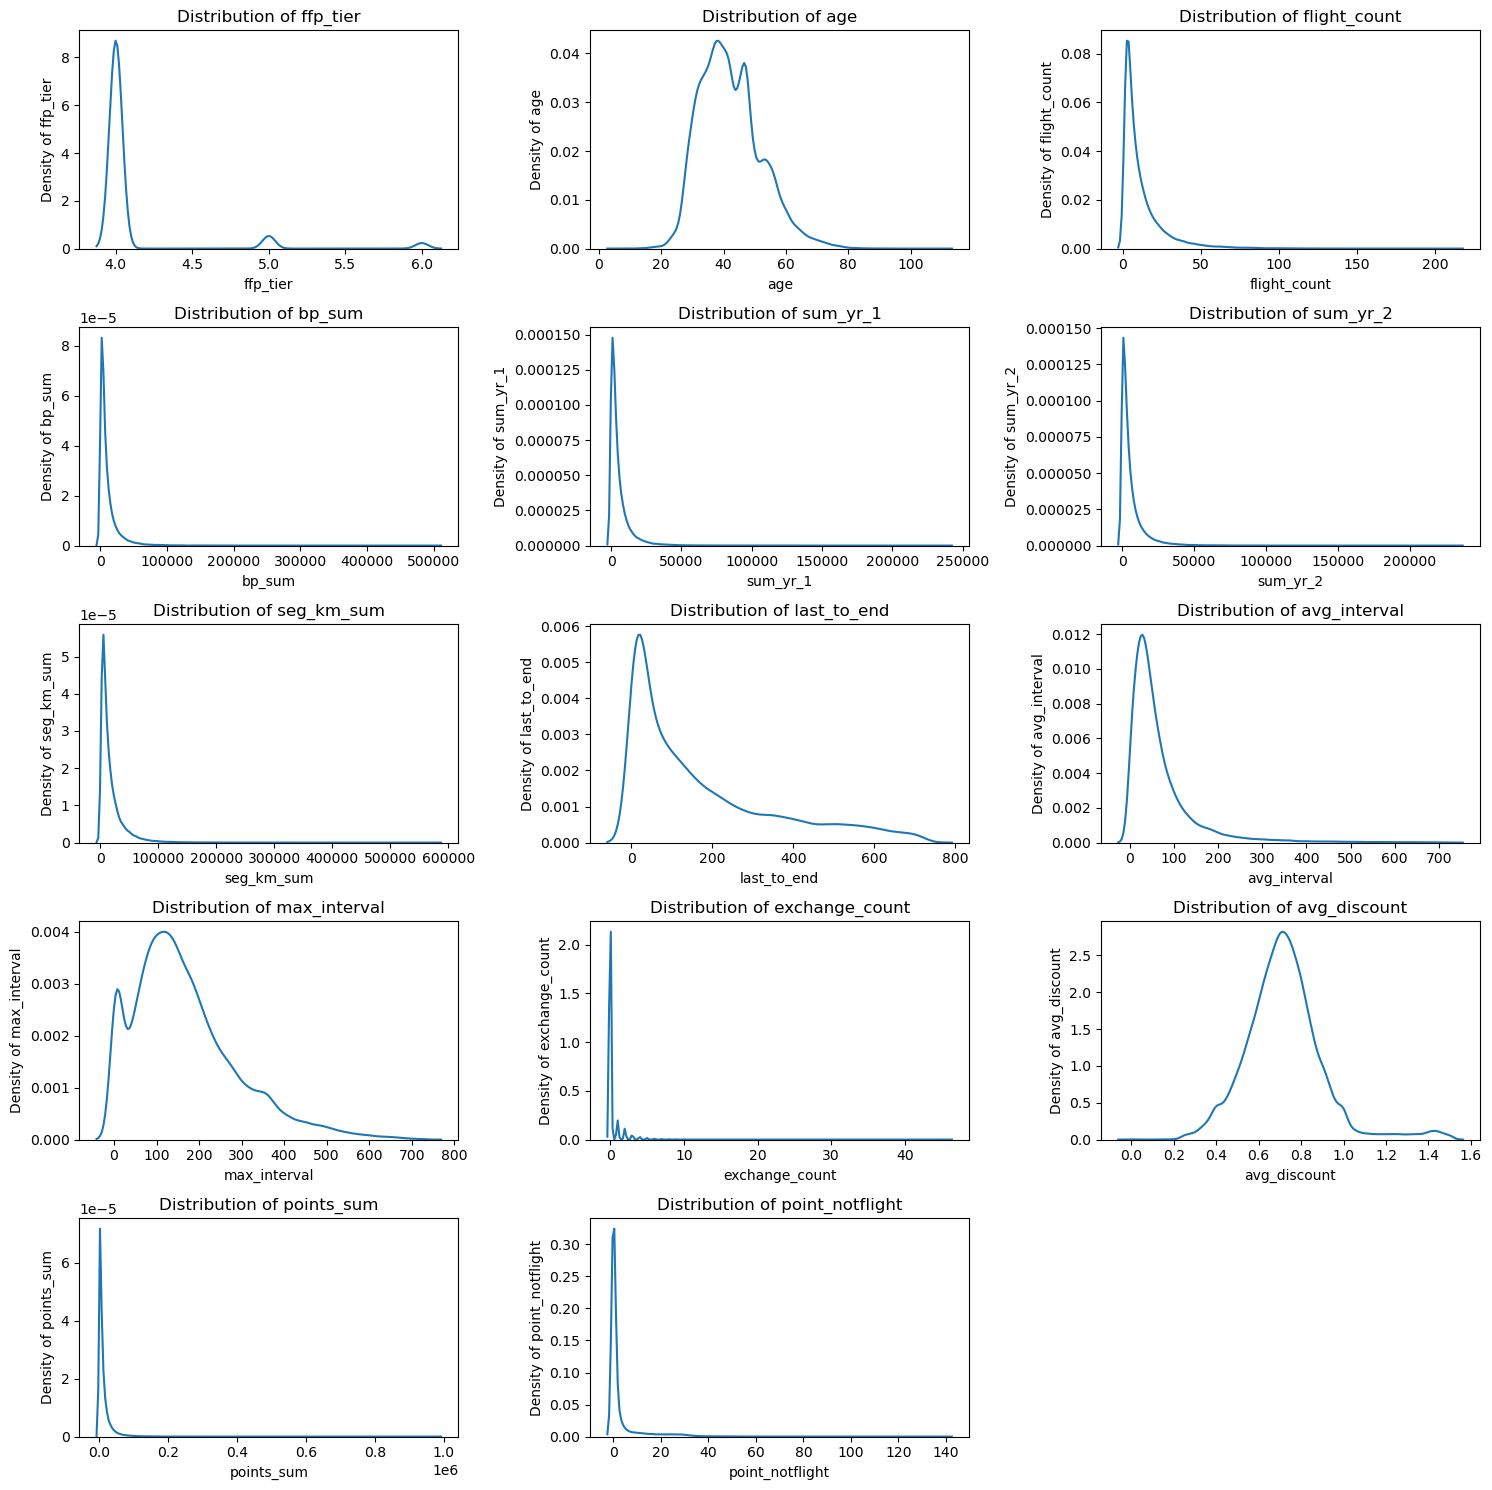

In [34]:
# Focusing only on kde
fig, axes = plt.subplots(nrows=5, ncols=3, figsize=(15, 15))
axes = axes.flatten()

for i in range(len(nums)) :
  sns.kdeplot(data = df, ax=axes[i], x=nums[i])
  axes[i].set_title(f'Distribution of {nums[i]}')
  axes[i].set_ylabel(f'Density of {nums[i]}')
  axes[i].set_xlabel(f'{nums[i]}')

# Remove the last subplot if there are fewer features than subplots
if len(nums) < len(axes):
    axes[len(nums)].remove()

plt.tight_layout()

All numeric columns have a right-skewed distribution/positively-skewed distribution except for the 'avg_discount' column. However, in the 'avg_discount' column, there are many average discounts greater than 1 (100%), and this is considered invalid. Therefore, it will not be used and will be dropped later.

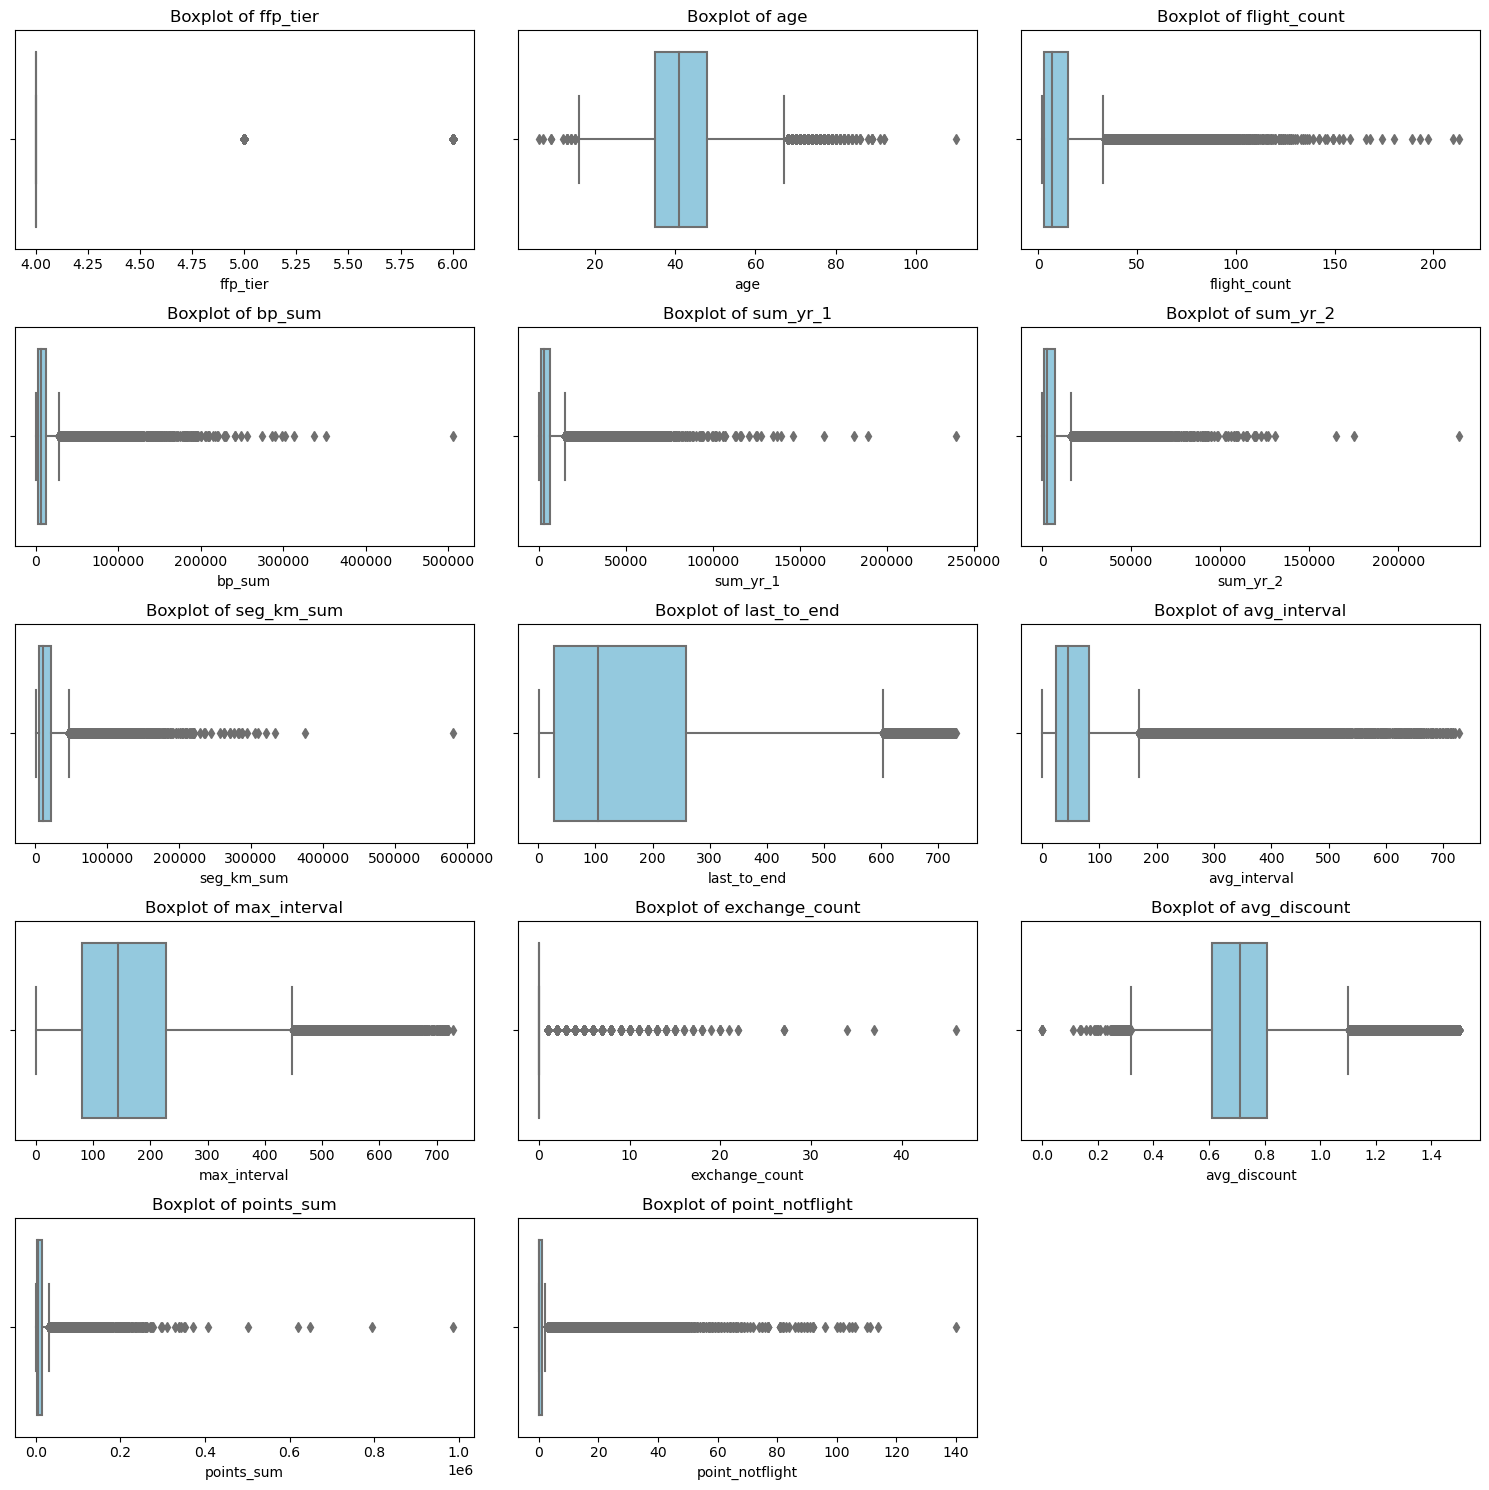

In [35]:
# Boxplot
fig, axes = plt.subplots(nrows=5, ncols=3, figsize=(15, 15))
axes = axes.flatten()

for i in range(len(nums)) :
  sns.boxplot(data=df, ax=axes[i], x=nums[i], orient='h', color='skyblue')
  axes[i].set_title(f'Boxplot of {nums[i]}')

# Remove the last subplot if there are fewer features than subplots
if len(nums) < len(axes):
    axes[len(nums)].remove()

plt.tight_layout()

There are numerous outliers that will be dropped using the IQR method due to the non-normal distribution of features in the previous findings

## Categorical Columns

In [36]:
df.columns

Index(['ffp_date', 'first_flight_date', 'gender', 'ffp_tier', 'work_city',
       'work_province', 'work_country', 'age', 'load_time', 'flight_count',
       'bp_sum', 'sum_yr_1', 'sum_yr_2', 'seg_km_sum', 'last_flight_date',
       'last_to_end', 'avg_interval', 'max_interval', 'exchange_count',
       'avg_discount', 'points_sum', 'point_notflight'],
      dtype='object')

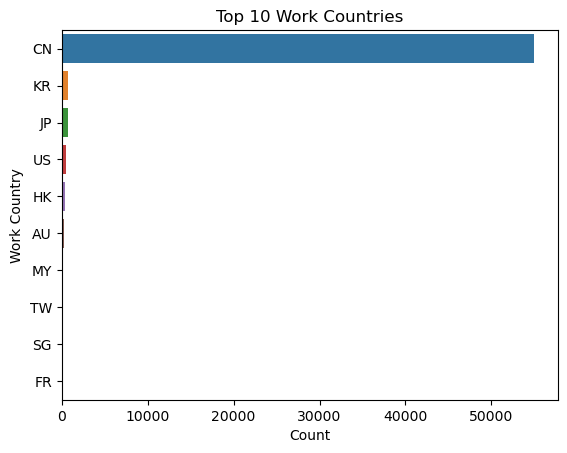

In [37]:
# Top 10 countries
df_country_top_10 = df['work_country'].value_counts().head(10)

sns.countplot(data=df, y='work_country', order=df_country_top_10.index)

plt.xlabel('Count')
plt.ylabel('Work Country')
plt.title('Top 10 Work Countries')
plt.show()

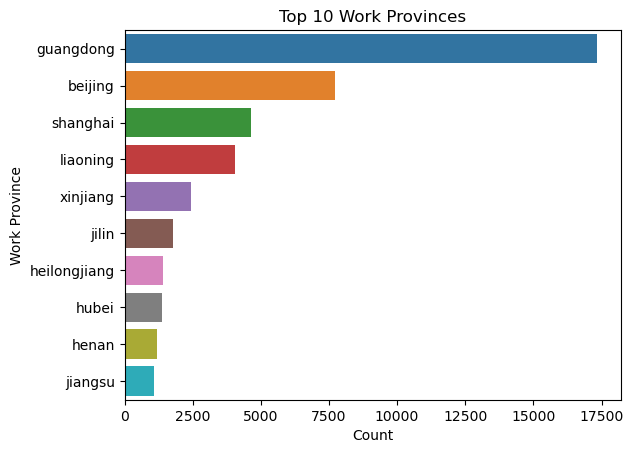

In [38]:
# Top 10 provinces
df_province_top_10 = df['work_province'].value_counts().head(10)

sns.countplot(data=df, y='work_province', order=df_province_top_10.index)

plt.xlabel('Count')
plt.ylabel('Work Province')
plt.title('Top 10 Work Provinces')
plt.show()

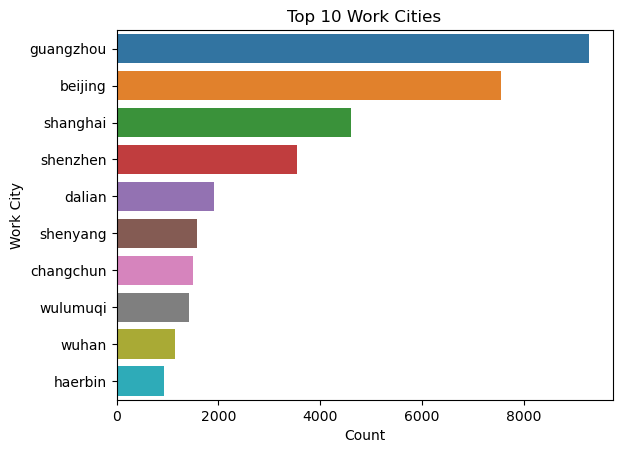

In [39]:
# Top 10 city
df_city_top_10 = df['work_city'].value_counts().head(10)

sns.countplot(y='work_city', data=df, order=df_city_top_10.index)

plt.xlabel('Count')
plt.ylabel('Work City')
plt.title('Top 10 Work Cities')
plt.show()

# Bivariate/Multivariate Analysis

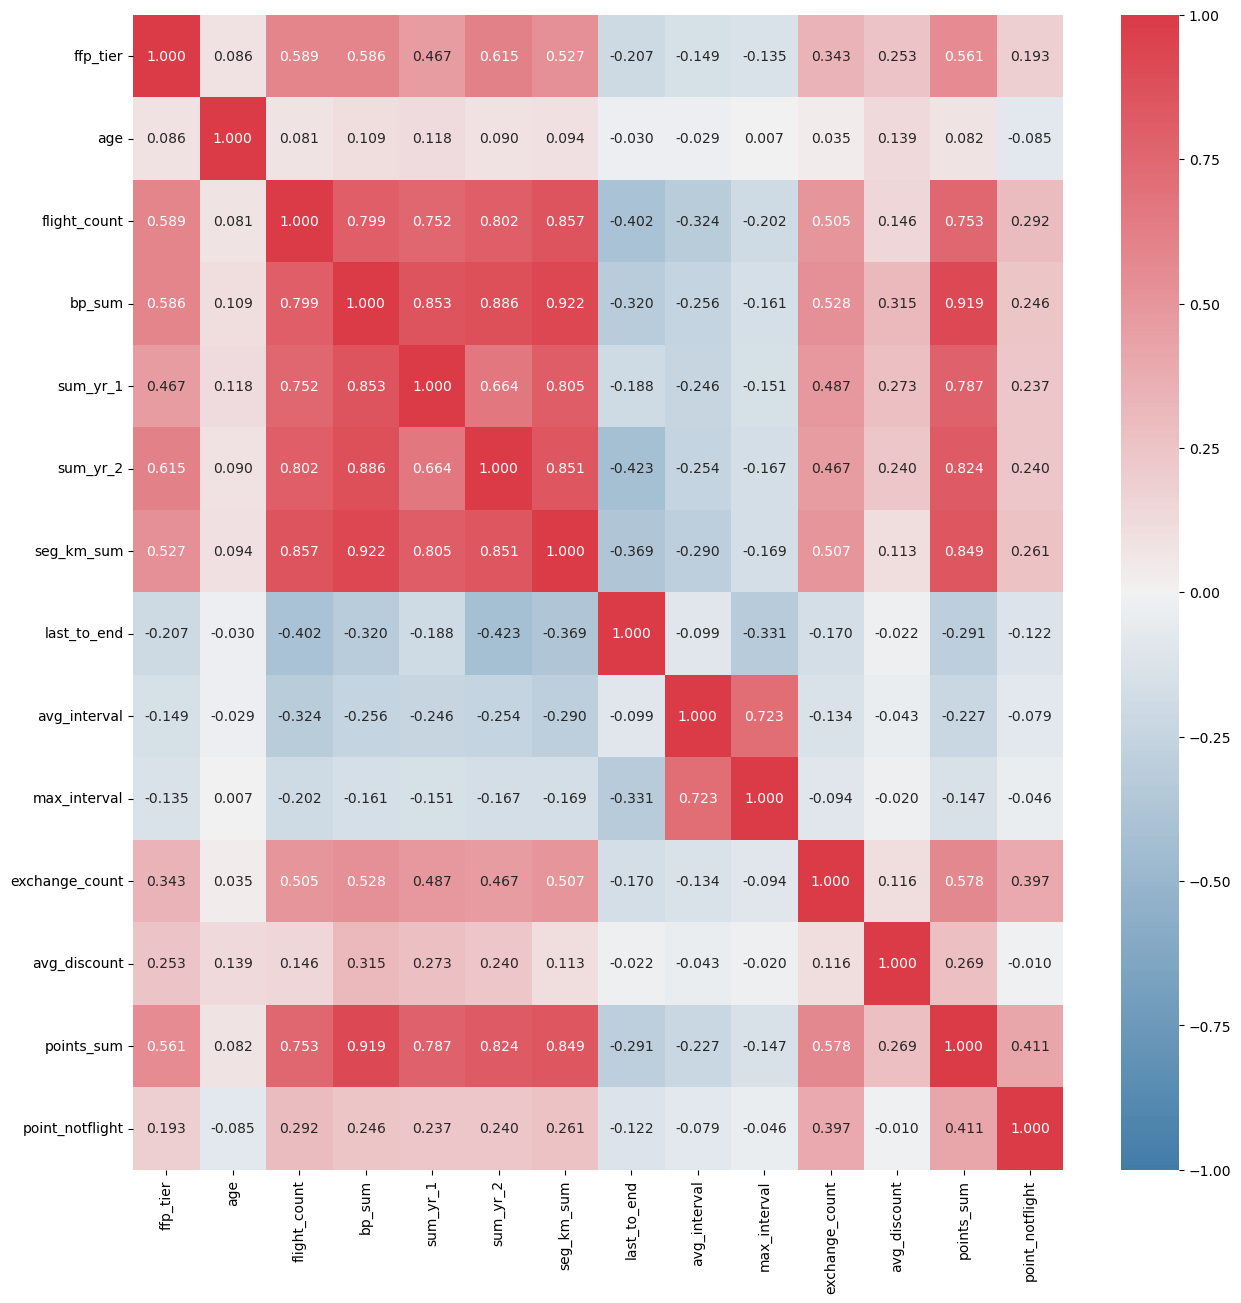

In [40]:
# Heatmap
plt.figure(figsize=(15,15))
cmap_custom = sns.diverging_palette(240, 10, as_cmap=True)
sns.heatmap(data = df.corr(numeric_only=True), cmap=cmap_custom, annot=True, fmt='.3f', vmin=-1, vmax=1)
plt.show()

- Columns with strong correlation (equal to/above 0.3):
    - ffp_tier with flight_count, bp_sum, sum_yr_1, sum_yr_2, seg_km_sum, exchange_count, points_sum
    - flight_count with bp_sum, sum_yr_1, sum_yr_2, seg_km_sum, last_to_end, avg_interval, exchange_count, points_sum
    - bp_sum with sum_yr_1, sum_yr_2, seg_km_sum, last_to_end, exchange_count, avg_discount, poins_sum
    - sum_yr_1 with sum_yr_2, seg_km_sum, exchange_count, points_sum
    - sum_yr_2 with seg_km_sum, last_to_end, exchange_count, points_sum
    - seg_km_sum with last_to_end, exchange_count, points_sum
    - last_to_end with max_interval
    - avg_interval with max_interval
    - exchange_count with points_sum, point_notflight
    - points_sum with point_notflight
<br/><br/>
 - Columns with high multicollinearity (equal to/above 0.7):
    - flight_count with bp_sum, sum_yr_1, sum_yr_2, seg_km_sum, points_sum
    - bp_sum with sum_yr_1, sum_yr_2, seg_km_sum, poins_sum    
    - sum_yr_1 with seg_km_sum, points_sum
    - sum_yr_2 with seg_km_sum, points_sum
    - avg_interval with max_interval

We can also see from the colour that the feature age and max_interval have low correlation score to almost all other features

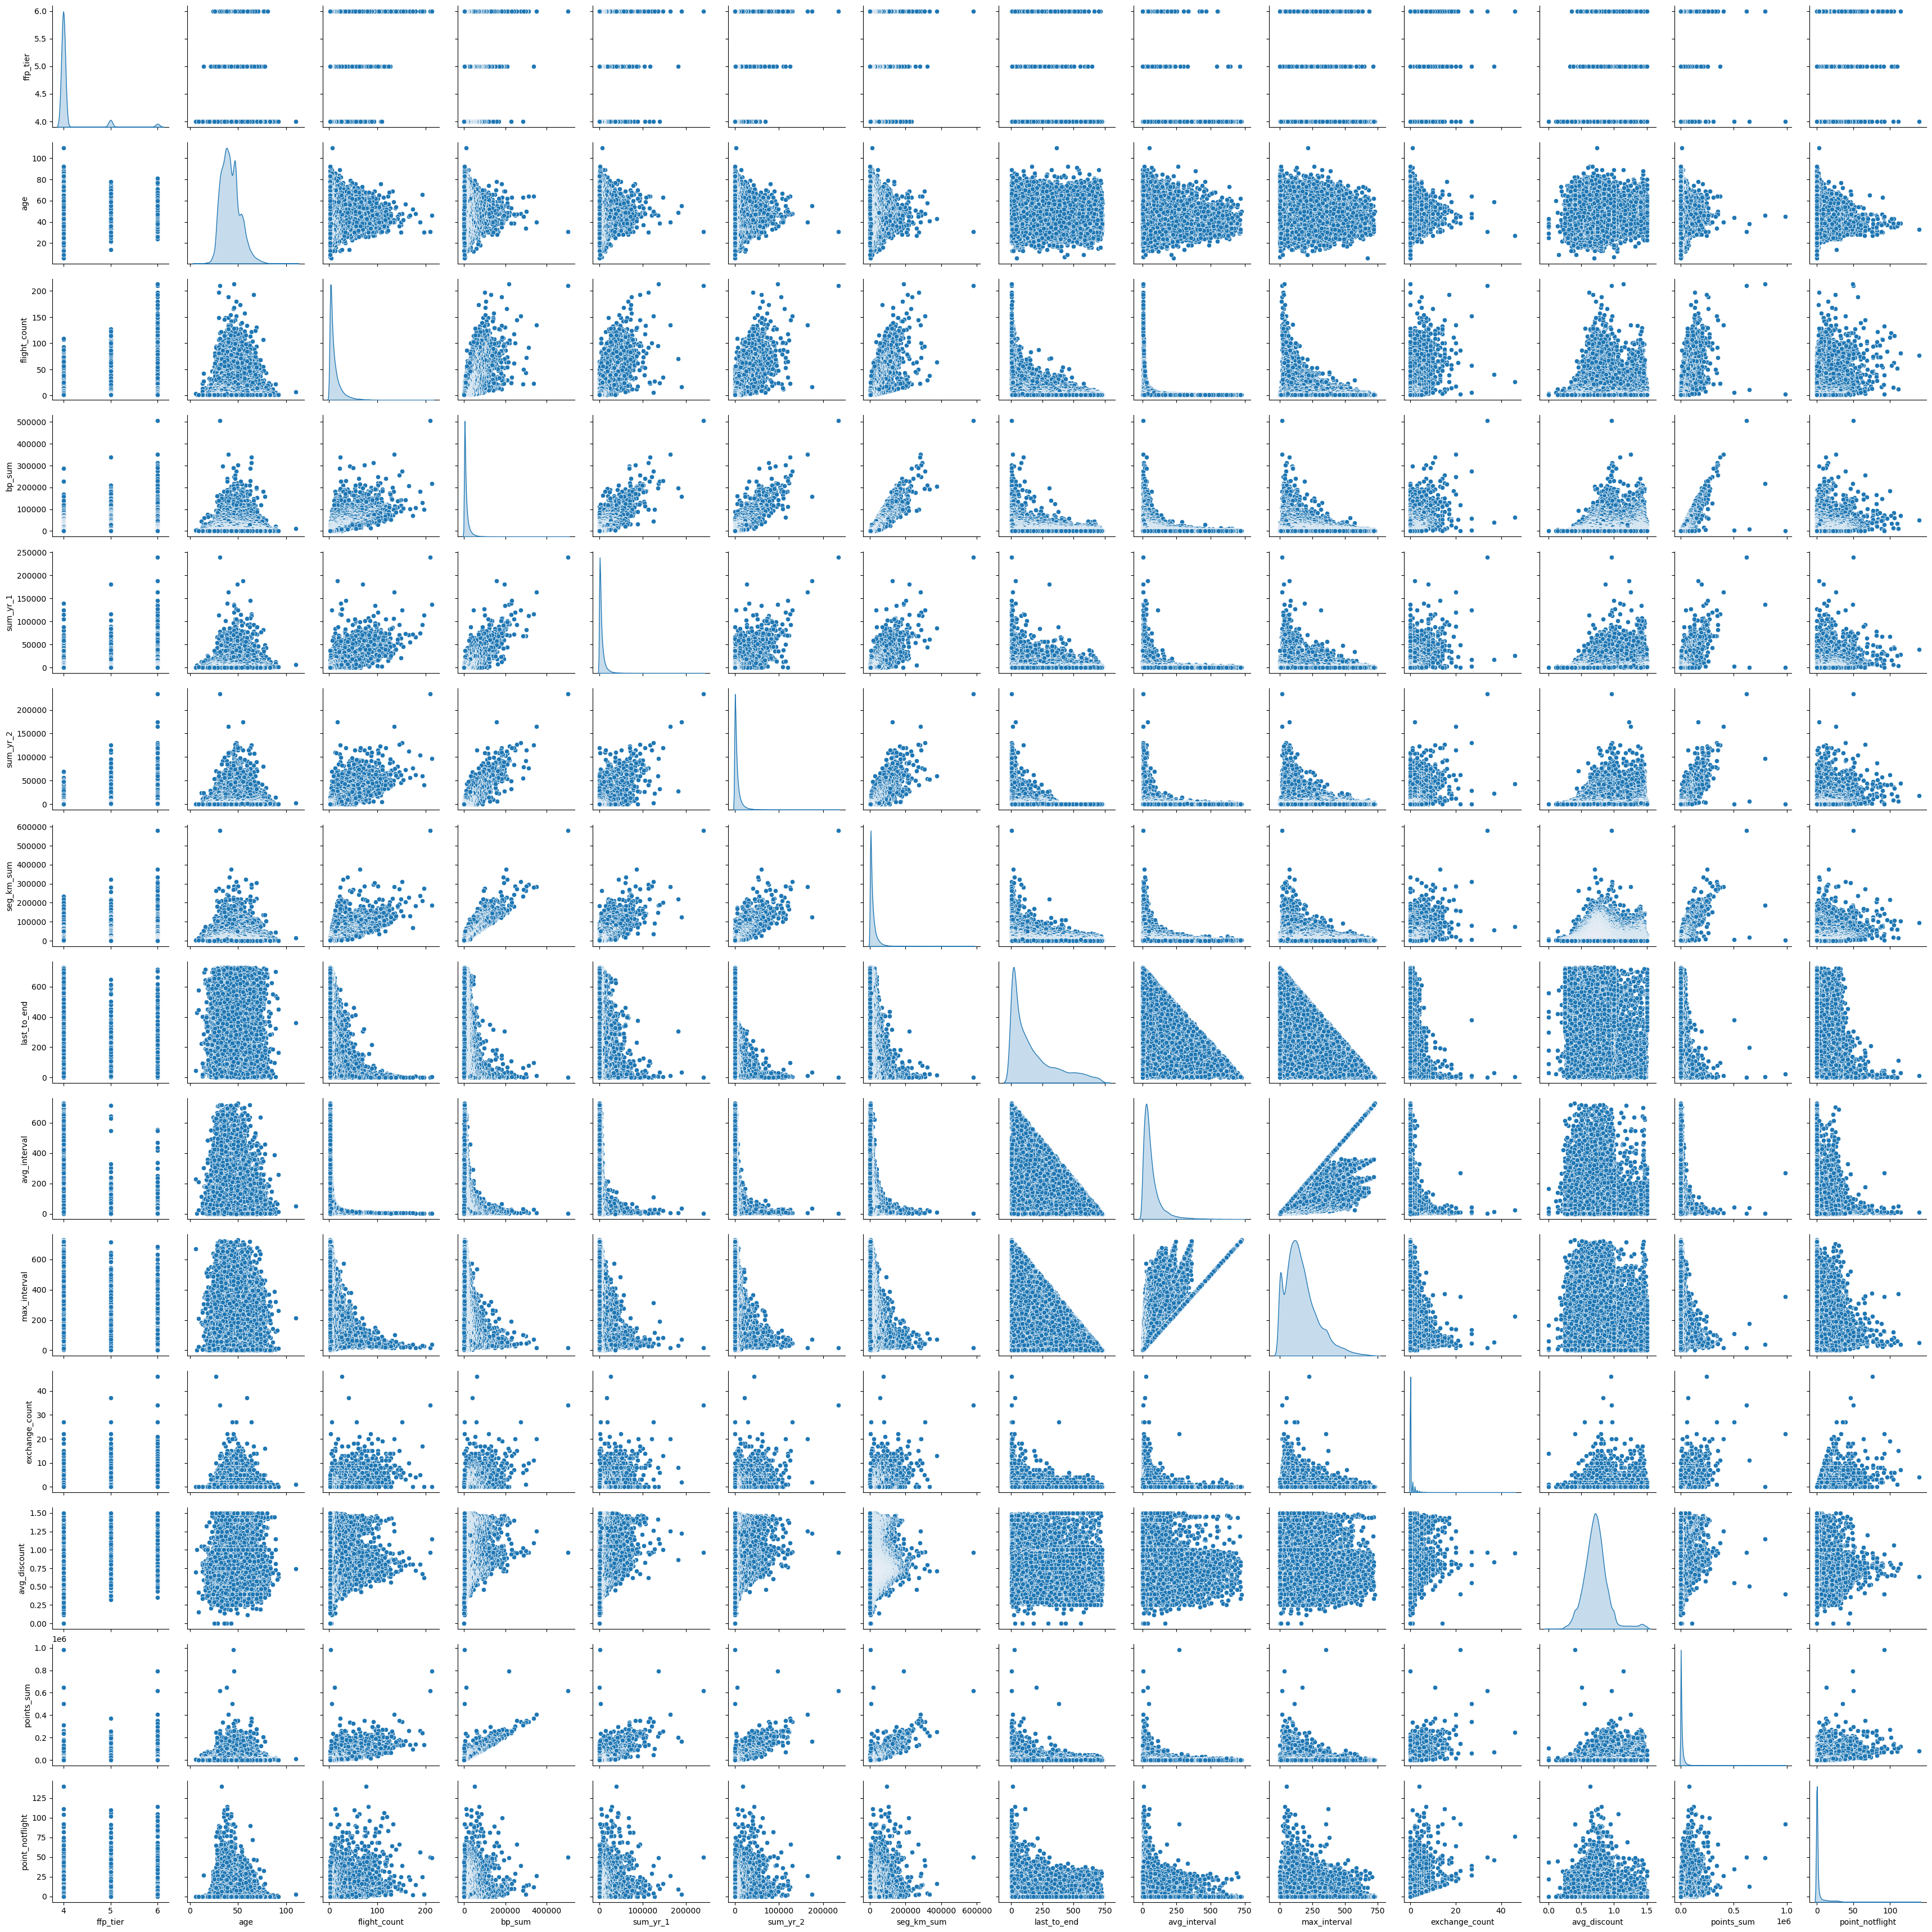

In [41]:
# Pairplot before clustering
sns.pairplot(data=df, diag_kind='kde')
plt.show()

# Feature Selection Thinking Process

LRFMC Model that is commonly used in aviation dataset. LRMFC stands for Length, Recency, Frequency, Monetary and Discount Factor. The details of each parameter is elaborated below:

- Length: the length of days between subscriber's first register day to observation time. A larger number means they have been a member for a longer time
- Recency: the length of a passenger's last consumption to observation window. A smaller number means they flew more recently
- Frequency: the passenger's consumption frequency within a certain period of time. A bigger number means they flew more frequently
- Monetary the average amount spent over a certain period of time. A bigger number means they spent more money
- Discount Factor: the average space discount factor for passengers traveling within a certain period of time A bigger number means they use discounts more

After looking at the data, we use columns below that related to the LRFMC features:

- Length: LOAD_TIME - FFP_DATE
- Recency: LAST_TO_END
- Frequency: FLIGHT_COUNT
- Monetary: SEG_KM_FM
- Customer Cost: avg_discount

But unfortunately since we remember at the beginning that the avg_discount feature have some problems we will just use LRFM analysis

In [42]:
#Feature engineering of loyalty

from datetime import timedelta

df['loyalty'] = df['load_time'] - df['ffp_date']

# Define a function to convert timedelta to months
def timedelta_to_months(td):
    total_days = td.total_seconds() / (60 * 60 * 24) #total second in an minute, total minute in an hour, and total hour in a day
    return total_days / 30.44 #average days in a month

# Apply the function to the 'loyalty' column
df['loyalty'] = df['loyalty'].apply(timedelta_to_months)
df.sample(10)

ffp_date first_flight_date gender  ffp_tier   work_city work_province  \
16893 2012-04-01        2012-04-01   Male         4     taiyuan        shanxi   
54120 2008-03-07        2010-04-10   Male         4      haikou        hainan   
31035 2012-07-07        2012-07-08   Male         4     tiantai      zhejiang   
45209 2010-02-22        2010-02-22   Male         4    wuhanshi    hubeisheng   
35364 2011-10-25        2011-10-25   Male         4    shenzhen     guangdong   
5413  2010-11-06        2011-04-20   Male         4  beijingshi       beijing   
46420 2005-11-23        2006-01-14   Male         4     beijing       beijing   
29211 2011-10-10        2011-12-19   Male         4  kunmingshi   yunnansheng   
35151 2006-09-27        2007-10-13   Male         4   guangzhou     guangdong   
39562 2012-09-05        2012-09-05   Male         4     beijing             .   

      work_country  age  load_time  flight_count  bp_sum  sum_yr_1  sum_yr_2  \
16893           CN   47 2014-03-31            17   13881      2139      5268   
54120           CN   56 2014-03-31             2    2467       621      1348   
31035           CN   35 2014-03-31             7    6100      1200         0   
45209           CN   47 2014-03-31             4    2386      2484       672   
35364           CN   46 2014-03-31             8    3567      3058      2276   
5413            CN   45 2014-03-31            24   30606     21960      8039   
46420           CN   47 2014-03-31             4    3290         0      2356   
29211           CN   59 2014-03-31             9    6529      2401      4357   
35151           CN   43 2014-03-31             6    6040      4133      1144   
39562           CN   42 2014-03-31             5    4476      1230      2142   

       seg_km_sum last_flight_date  last_to_end  avg_interval  max_interval  \
16893       17846       2014-01-26           66     41.562500           139   
54120        2680       2013-11-28          125    340.000000           340   
31035        8299       2013-06-19          287     57.666667           307   
45209        5109       2013-05-11          326     65.666667           133   
35364       10406       2014-02-26           35     98.000000           251   
5413        22266       2014-03-15           17     30.304348           157   
46420        3770       2014-03-12           20     73.666667           129   
29211       10722       2014-03-20           12     69.000000           188   
35151        9657       2014-02-05           56    128.600000           490   
39562        5305       2013-09-29          185     97.250000           377   

       exchange_count  avg_discount  points_sum  point_notflight     loyalty  
16893               0      0.805533       13881                0   23.948752  
54120               0      0.799250        2467                0   72.766097  
31035               0      0.859293        6100                0   20.762155  
45209               0      0.702182        2386                0   49.211564  
35364               0      0.558550        3567                0   29.172142  
5413                0      1.464651       31871                1   40.768725  
46420               0      0.893260        3290                0  100.197109  
29211               0      0.724515        6529                0   29.664915  
35151               1      0.607917        7540                2   90.078844  
39562               0      0.895762        4476                0   18.791064

In [43]:
#Select relevant features for analysis
selected_features = ['loyalty', 'last_to_end', 'flight_count', 'seg_km_sum']

df_selected = df[selected_features].copy()

In [44]:
# # Feature rename to LRFM
# df_selected.columns = ['L','R','F','M','C']

We could just change the columns name modified to LRFM but we will just keep the original name for better understanding and context.

# Handling Outliers


As explained before that the consideration in using the IQR (Interquartile Range) method to remove outliers is because the distribution of the data is skewed or not normal

**Additional Reminder (for me especially) About Outliers Handling**

Both IQR (Interquartile Range) and Z-Score methods are commonly used for handling outliers in a dataset. The choice between them depends on the nature of the data and the specific requirements of the analysis. Here are some considerations for when to use each method:

1. **IQR (Interquartile Range):**
   - **When the distribution is not normal or skewed:** IQR is robust to skewed distributions, making it suitable for datasets that do not follow a normal distribution.
   - **When there are suspected extreme values:** IQR is less sensitive to extreme values compared to Z-Score, making it suitable for datasets with potential outliers.

2. **Z-Score:**
   - **When the distribution is approximately normal:** Z-Score assumes a normal distribution, and it is more appropriate when dealing with data that is approximately normally distributed.
   - **For standardized comparisons:** Z-Score provides a standardized measure of how far each data point is from the mean, making it useful for comparing outliers across different datasets.

3. **Considerations for Both Methods:**
   - **Nature of the data:** Understand the characteristics of the data and the underlying distribution. If the data is strongly skewed, IQR might be more suitable. If it approximately follows a normal distribution, Z-Score could be considered.
   - **Analysis goals:** Consider the goals of your analysis. If your primary concern is identifying extreme values or handling skewed data, IQR may be preferable. If you need a standardized measure for comparisons, Z-Score might be more appropriate.

In many cases, it's beneficial to explore and compare the results of both methods to determine which one is more effective for a particular dataset and analysis goal. Additionally, visual exploration of the data using box plots or histograms can provide insights into the distribution and potential outliers, helping in the decision-making process.

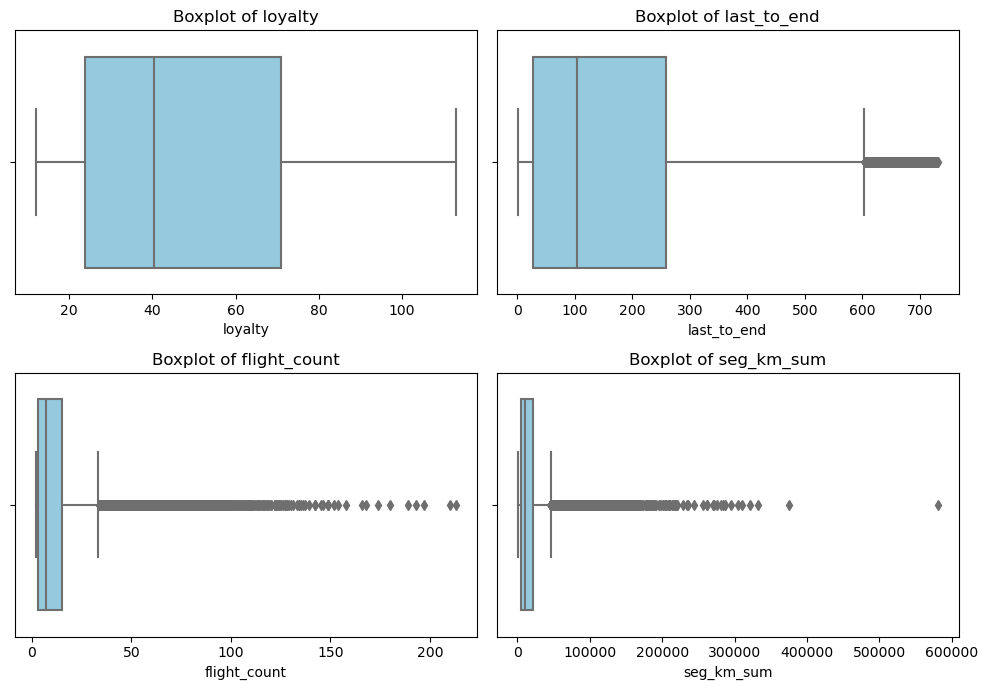

In [45]:
# Boxplot before handling outliers
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 7))
axes = axes.flatten()

for i in range(len(selected_features)) :
  sns.boxplot(data = df_selected, ax=axes[i], x=selected_features[i], orient='h', color='skyblue')
  axes[i].set_title(f'Boxplot of {selected_features[i]}')

# Remove the last subplot if there are fewer features than subplots
if len(selected_features) < len(axes):
    axes[len(selected_features)].remove()

plt.tight_layout()

In [46]:
# Remove outliers with IQR method

print(f'The number of rows before filtering out outliers : {len(df_selected)}')

filtered_entries = np.array([True] * len(df_selected))

# Select features with outliers
for col in selected_features:

    Q1 = df_selected[col].quantile(0.25)
    Q3 = df_selected[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - (IQR * 1.5)
    upper_bound = Q3 + (IQR * 1.5)

    filtered_entries = ((df_selected[col] >= lower_bound) & (df_selected[col] <= upper_bound)) & filtered_entries

df_filtered = df_selected[filtered_entries]

print(f'The number of rows after filtering out outliers: {len(df_filtered)}')

The number of rows before filtering out outliers : 58255
The number of rows after filtering out outliers: 50710


In [47]:
# # Remove outliers with z-score method

# from scipy import stats

# print(f'The number of rows before filtering out outliers : {len(df_selected)}')

# filtered_entries = np.array([True] * len(df_selected))

# Select features with outliers
# for col in selected_features:
#     zscore = abs(stats.zscore(df_selected[col])) # calculate the absolute z-score
#     filtered_entries = (zscore < 3) & filtered_entries # keep z-score values less than absolute 3
    
# df_filtered = df_selected[filtered_entries]

# print(f'The number of rows after filtering out outliers: {len(df_filtered)}')

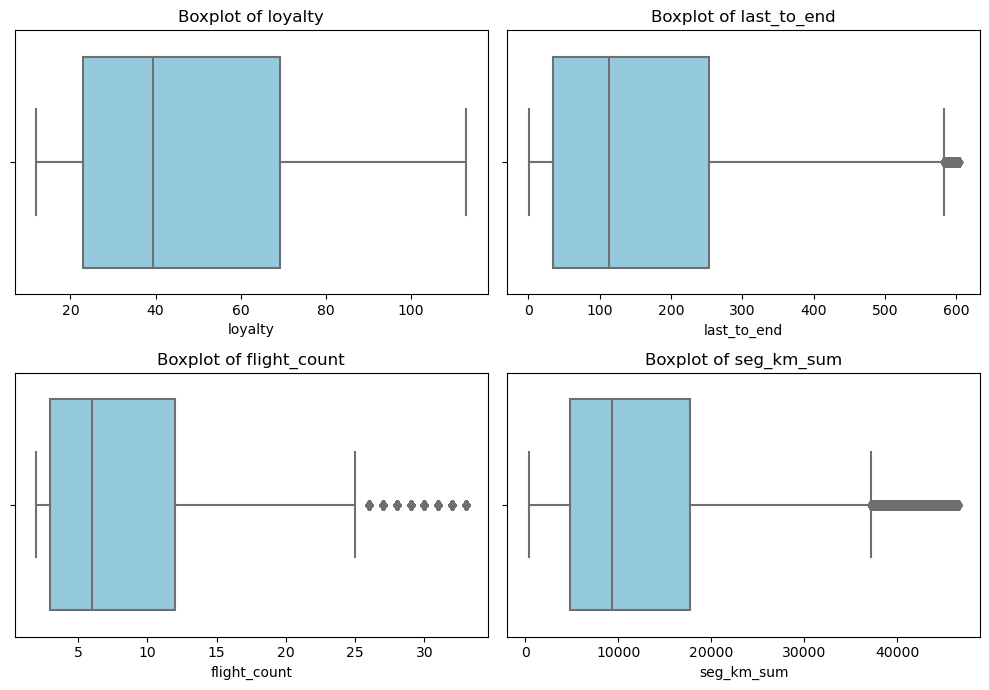

In [48]:
# Boxplot after handling outliers
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 7))
axes = axes.flatten()

for i in range(len(selected_features)) :
  sns.boxplot(data = df_filtered, ax=axes[i], x=selected_features[i], orient='h', color='skyblue')
  axes[i].set_title(f'Boxplot of {selected_features[i]}')

# Remove the last subplot if there are fewer features than subplots
if len(selected_features) < len(axes):
    axes[len(selected_features)].remove()

plt.tight_layout()

# Feature Scaling

In [49]:
#Create copy of filtered dataframe before scaling process

df_before_scale = df_selected.copy()

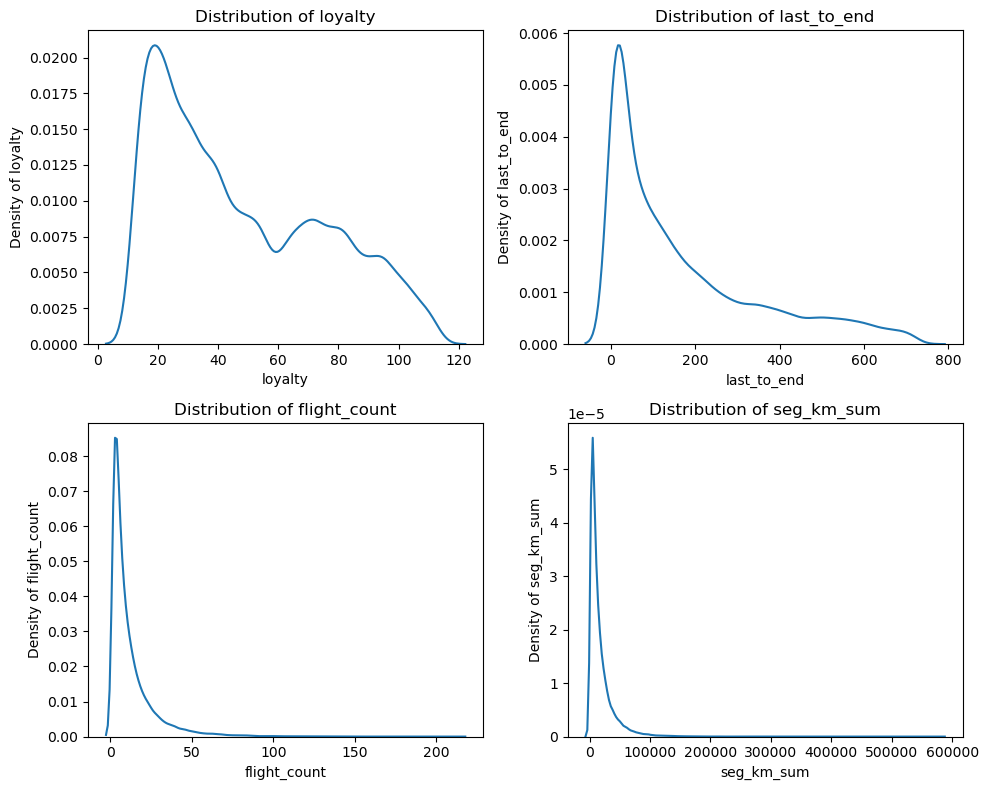

In [50]:
#Kdeplot before scaling

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10,8))
axes = axes.flatten()

for i in range(len(selected_features)) :
    sns.kdeplot(data=df_before_scale, ax=axes[i], x=selected_features[i])
    axes[i].set_title(f'Distribution of {selected_features[i]}')
    axes[i].set_ylabel(f'Density of {selected_features[i]}')
    axes[i].set_xlabel(f'{selected_features[i]}')

# Remove the last subplot if there are fewer features than subplots
if len(selected_features) < len(axes):
    axes[len(selected_features)].remove()

plt.tight_layout()

In [51]:
# # Log transformation
# df_before_scale[selected_features] = np.log1p(df_before_scale[selected_features])

In [52]:
# Standardization
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
df_std_values = ss.fit_transform(df_before_scale[selected_features])

In [53]:
#Check the values of scalled features
df_std_values

array([[ 1.48140186, -0.94293674, 13.90330889, 26.86561168],
       [ 1.37309737, -0.88755305,  8.63510447, 12.70208506],
       [ 0.69708688, -0.4112533 ,  0.76791921, 12.58877875],
       ...,
       [ 0.02702719, -0.45556026, -0.56669258, -0.4452614 ],
       [ 1.73966643, -0.7878624 , -0.70717803, -0.70382486],
       [-1.24168263,  1.26687253, -0.70717803, -0.63992315]])

In [54]:
# Initialize new dataframe
df_std = pd.DataFrame(df_std_values, columns=selected_features)
df_std.sample(5)

loyalty  last_to_end  flight_count  seg_km_sum
46235 -1.133378     0.214582     -0.566693   -0.633724
13896  0.173417    -0.743555     -0.707178    0.442925
19821  0.579261     0.247813      0.065492    0.050549
5819   0.141282    -0.882015      0.486948    1.266970
4446  -0.199103    -0.904168      1.189376    0.842835

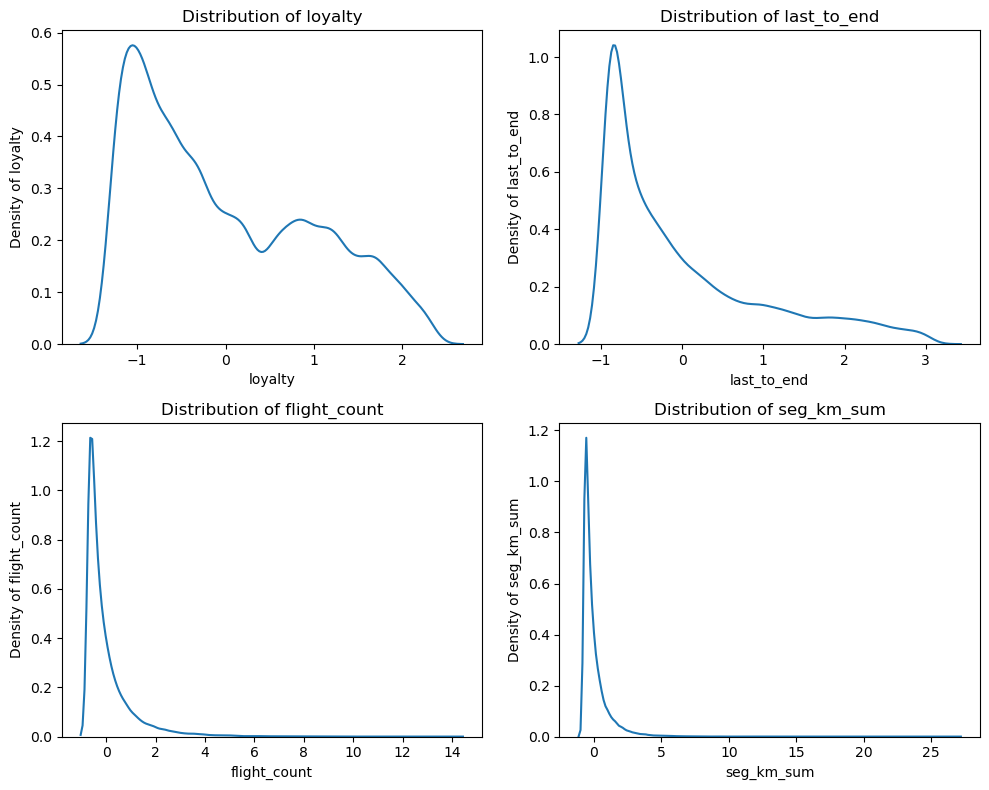

In [55]:
#Kdeplot after scaling
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10,8))
axes = axes.flatten()

for i in range(len(selected_features)) :
    sns.kdeplot(data=df_std, ax=axes[i], x=selected_features[i])
    axes[i].set_title(f'Distribution of {selected_features[i]}')
    axes[i].set_ylabel(f'Density of {selected_features[i]}')
    axes[i].set_xlabel(f'{selected_features[i]}')

# Remove the last subplot if there are fewer features than subplots
if len(selected_features) < len(axes):
    axes[len(selected_features)].remove()
    
plt.tight_layout()

In [56]:
# Create copy dataframe before moving to modelling process
df_model = df_std.copy()

# Clustering : K-means

## Finding Optimal Cluster Using Elbow Method and Silhouette Score

<Axes: >

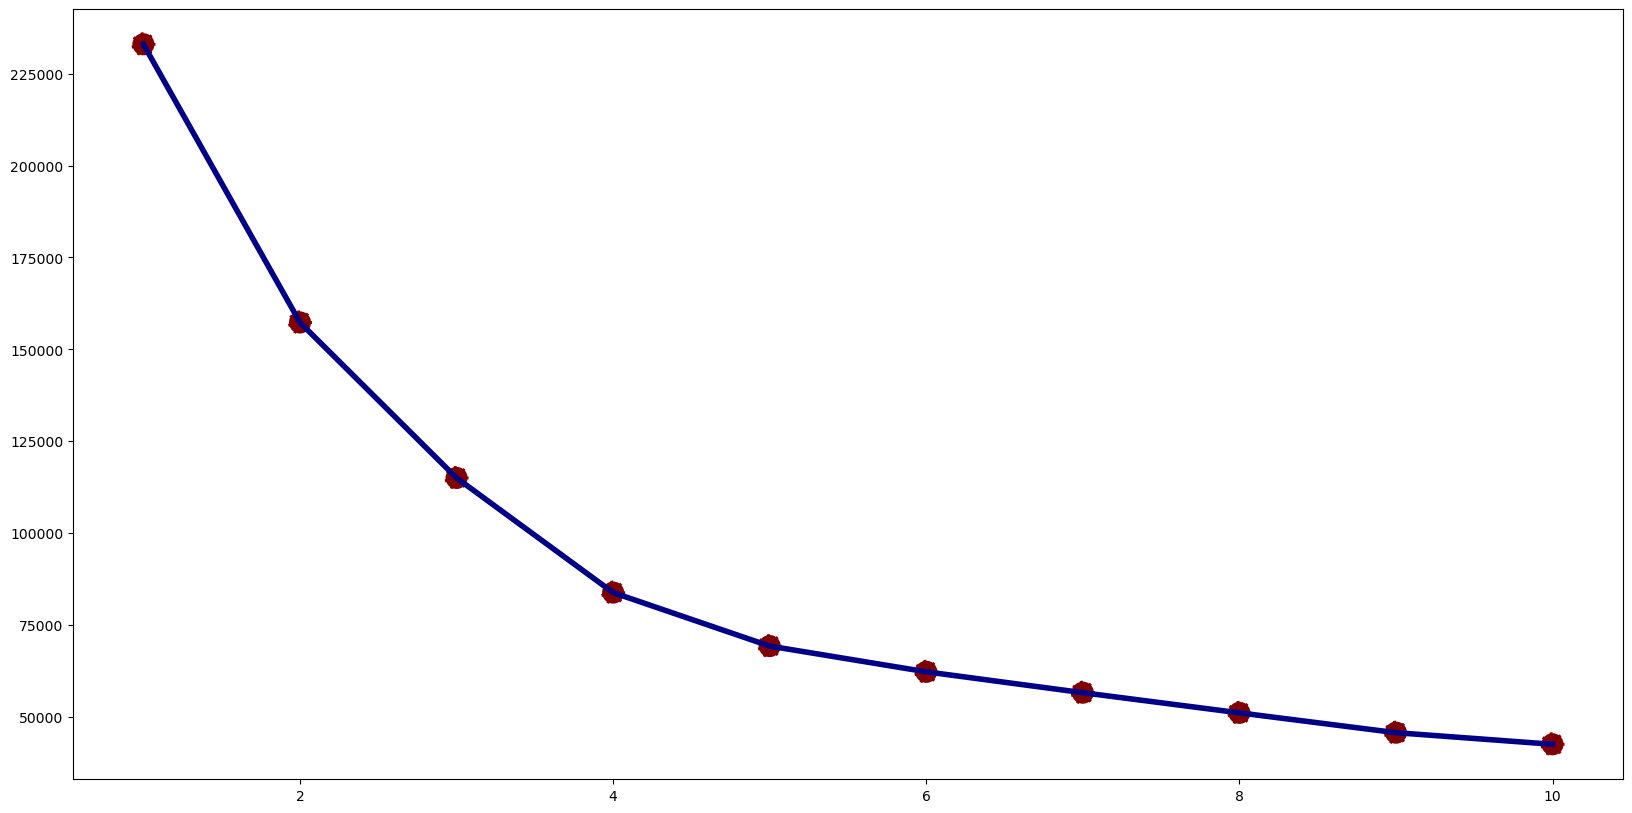

In [57]:
# Elbow method
from sklearn.cluster import KMeans
inertia = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=4)
    kmeans.fit(df_model)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(20, 10))
# plt.plot(inertia)

sns.lineplot(x=range(1, 11), y=inertia, color='#000087', linewidth = 4)
sns.scatterplot(x=range(1, 11), y=inertia, s=300, color='#800000',  linestyle='--')

In [58]:
#List of inertias
inertia

[233019.9999999996,
 157299.81076358288,
 114982.3328190984,
 83778.50222124853,
 69217.23957125848,
 62213.89788799048,
 56529.923785606494,
 51043.23915365398,
 45644.68675948269,
 42488.363363261255]

In [59]:
# Inertia reduction by cluster in percentage
(pd.Series(inertia) - pd.Series(inertia).shift(-1)) / pd.Series(inertia) * 100

0    32.495146
1    26.902434
2    27.137935
3    17.380667
4    10.117915
5     9.136181
6     9.705806
7    10.576430
8     6.914985
9          NaN
dtype: float64

We can see that from elbow method (internal evaluation), the number of optimal cluster is N = 5, because that's where the decrease of inertia is small for the next clusters

In [60]:
# Silhouette score
from sklearn.metrics import silhouette_score

arr_silhouette_score_euclidean = []
# arr_silhouette_score_mahalanobis = []

for i in list(range(2,11)):
    kmeans = KMeans(n_clusters=i).fit(df_model)
    preds = kmeans.predict(df_model)
    
    #Using euclidean (faster)
    score_euclidean = silhouette_score(df_model, preds, metric='euclidean')
    arr_silhouette_score_euclidean.append(score_euclidean)

    # #Using mahalanobis
    # score_mahalanobis = silhouette_score(df_std, preds, metric='mahalanobis')
    # arr_silhouette_score_mahalanobis.append(score_mahalanobis)

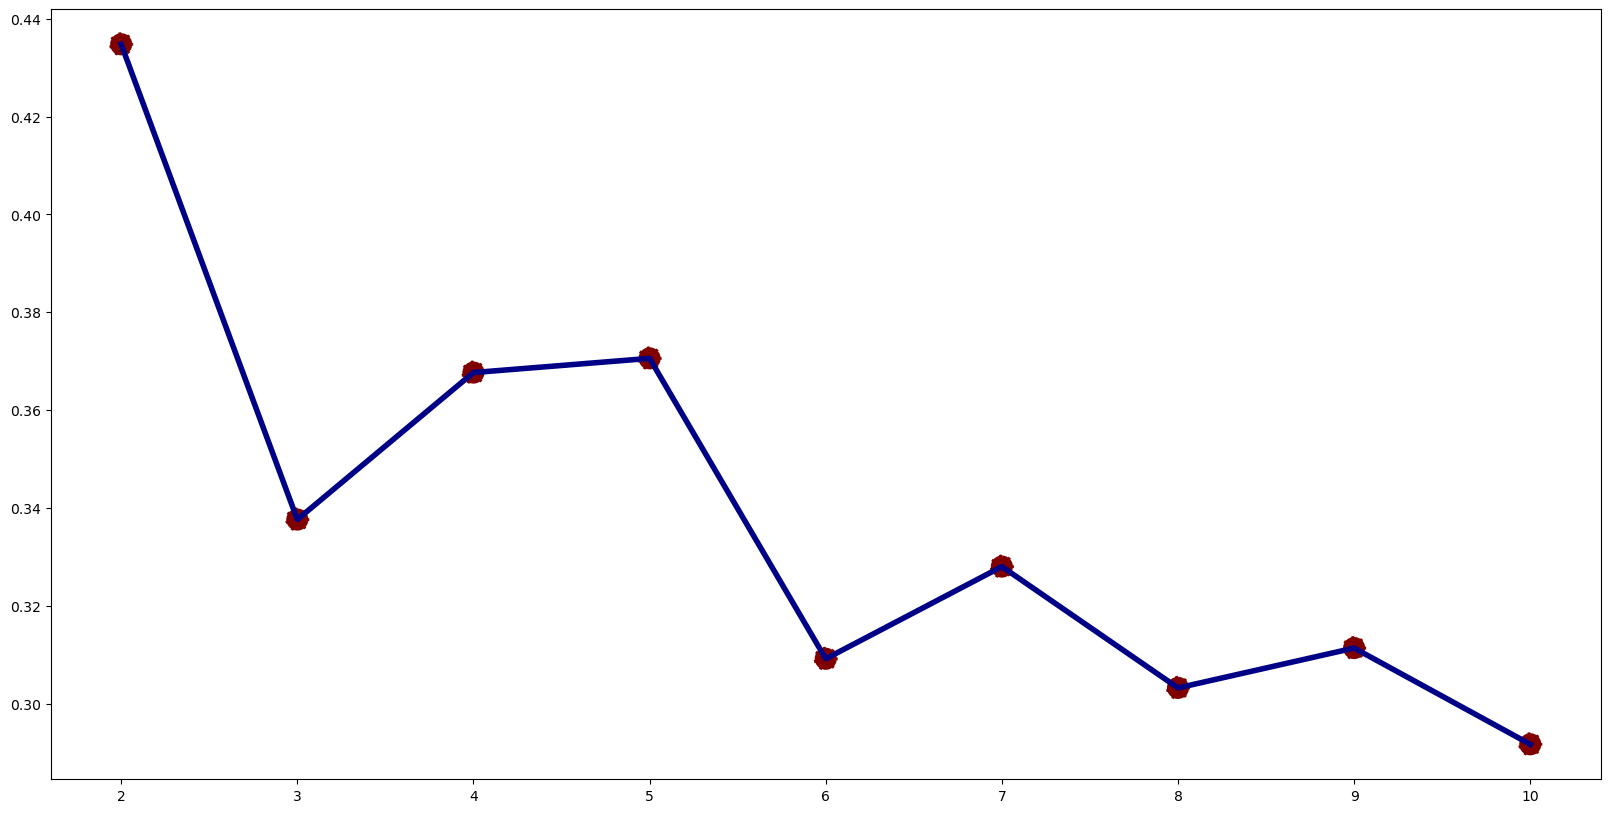

In [61]:
#Visualize silhouette score
fig, ax = plt.subplots(figsize=(20, 10))

#Using euclidean (faster)
sns.lineplot(x=range(2,11), y=arr_silhouette_score_euclidean, color='#000087', linewidth = 4)
sns.scatterplot(x=range(2,11), y=arr_silhouette_score_euclidean, s=300, color='#800000',  linestyle='--')

# #Using mahalanobis
# sns.lineplot(x=range(2,11), y=arr_silhouette_score_mahalanobis, color='#000087', linewidth = 4)
# sns.scatterplot(x=range(2,11), y=arr_silhouette_score_mahalanobis, s=300, color='#800000',  linestyle='--')

plt.show()

In [62]:
# Silhouette score reduction by cluster in percentage
(pd.Series(arr_silhouette_score_euclidean) - pd.Series(arr_silhouette_score_euclidean).shift(-1)) / pd.Series(arr_silhouette_score_euclidean) * 100

0    22.345432
1    -8.898783
2    -0.788413
3    16.571389
4    -6.095561
5     7.560336
6    -2.686822
7     6.317574
8          NaN
dtype: float64

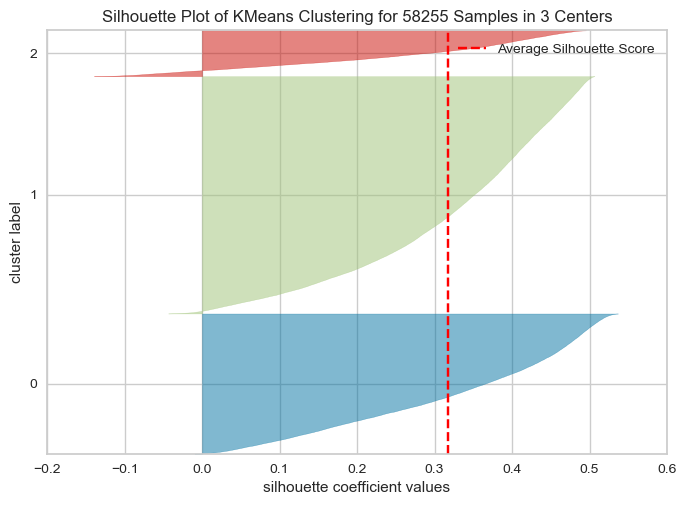

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 58255 Samples in 3 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [63]:
#Silhouetter plot (3 cluster)
from yellowbrick.cluster import SilhouetteVisualizer

# Instantiate the clustering model and visualizer
model = KMeans(3, random_state=42)
visualizer = SilhouetteVisualizer(model, colors='yellowbrick')

visualizer.fit(df_model)        # Fit the data to the visualizer
visualizer.show()                    # Finalize and render the figure

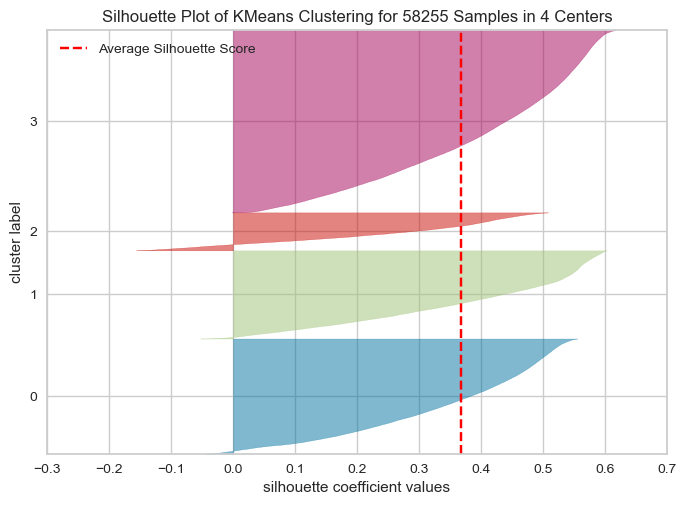

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 58255 Samples in 4 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [64]:
#Silhouetter plot (4 cluster)
from yellowbrick.cluster import SilhouetteVisualizer

# Instantiate the clustering model and visualizer
model = KMeans(4, random_state=42)
visualizer = SilhouetteVisualizer(model, colors='yellowbrick')

visualizer.fit(df_model)        # Fit the data to the visualizer
visualizer.show()                    # Finalize and render the figure

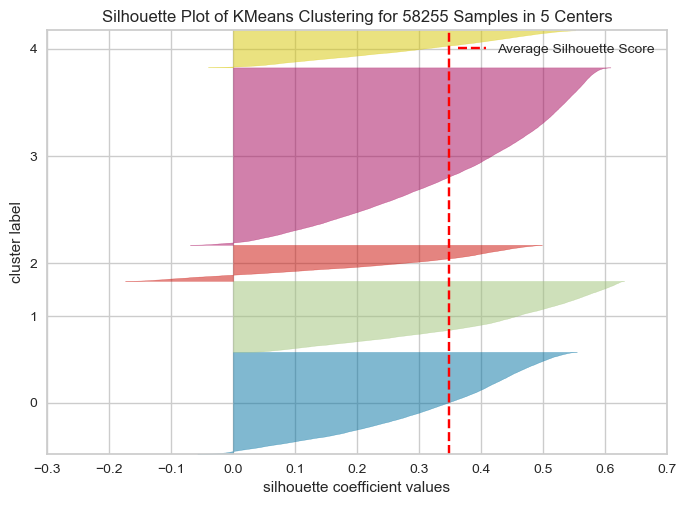

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 58255 Samples in 5 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [65]:
#Silhouetter plot (5 cluster)
from yellowbrick.cluster import SilhouetteVisualizer

# Instantiate the clustering model and visualizer
model = KMeans(5, random_state=42)
visualizer = SilhouetteVisualizer(model, colors='yellowbrick')

visualizer.fit(df_model)        # Fit the data to the visualizer
visualizer.show()                    # Finalize and render the figure

Reference for yellowbrick : https://www.scikit-yb.org/en/latest/api/cluster/silhouette.html

## Clustering Process Using K-means

In [66]:
#Fit cluster into our scaled dataframe
kmeans = KMeans(n_clusters=5, random_state=0).fit(df_model)

In [67]:
#Assign the cluster to our original dataframe and scaled dataframe
df_model['clusters'] = kmeans.labels_
df['clusters'] = kmeans.labels_

In [68]:
#See original dataframe by selected features with its assigned cluster
df[df_model.columns].head(5)

loyalty  last_to_end  flight_count  seg_km_sum  clusters
0  88.896189            1           210      580717         3
2  85.906702           11           135      283712         3
3  67.247043           97            23      281336         3
4  59.658344            5           152      309928         3
5  73.620237           79            92      294585         3

In [69]:
#See scaled dataframe with its assigned cluster
df_model.head(5)

loyalty  last_to_end  flight_count  seg_km_sum  clusters
0  1.481402    -0.942937     13.903309   26.865612         3
1  1.373097    -0.887553      8.635104   12.702085         3
2  0.697087    -0.411253      0.767919   12.588779         3
3  0.422160    -0.920783      9.829231   13.952269         3
4  0.927978    -0.510944      5.614667   13.220595         3

# PCA and Visualization

Since there are 5 features being used, PCA should be employed for 2D visualization to make it easier to observe.

In [70]:
#PCA method to reduce features to 2
from sklearn.decomposition import PCA 
pca = PCA(n_components=2)

pca.fit(df_model)
pcs = pca.transform(df_model)

data_pca = pd.DataFrame(data = pcs, columns = ['PC 1', 'PC 2'])
data_pca['clusters'] = df_model['clusters']
data_pca.head(5)

PC 1       PC 2  clusters
0  13.590363  24.009215         3
1   7.859217  12.287907         3
2   5.017084   7.517963         3
3   8.242258  13.879941         3
4   6.776511  10.800319         3

<Axes: xlabel='PC 1', ylabel='PC 2'>

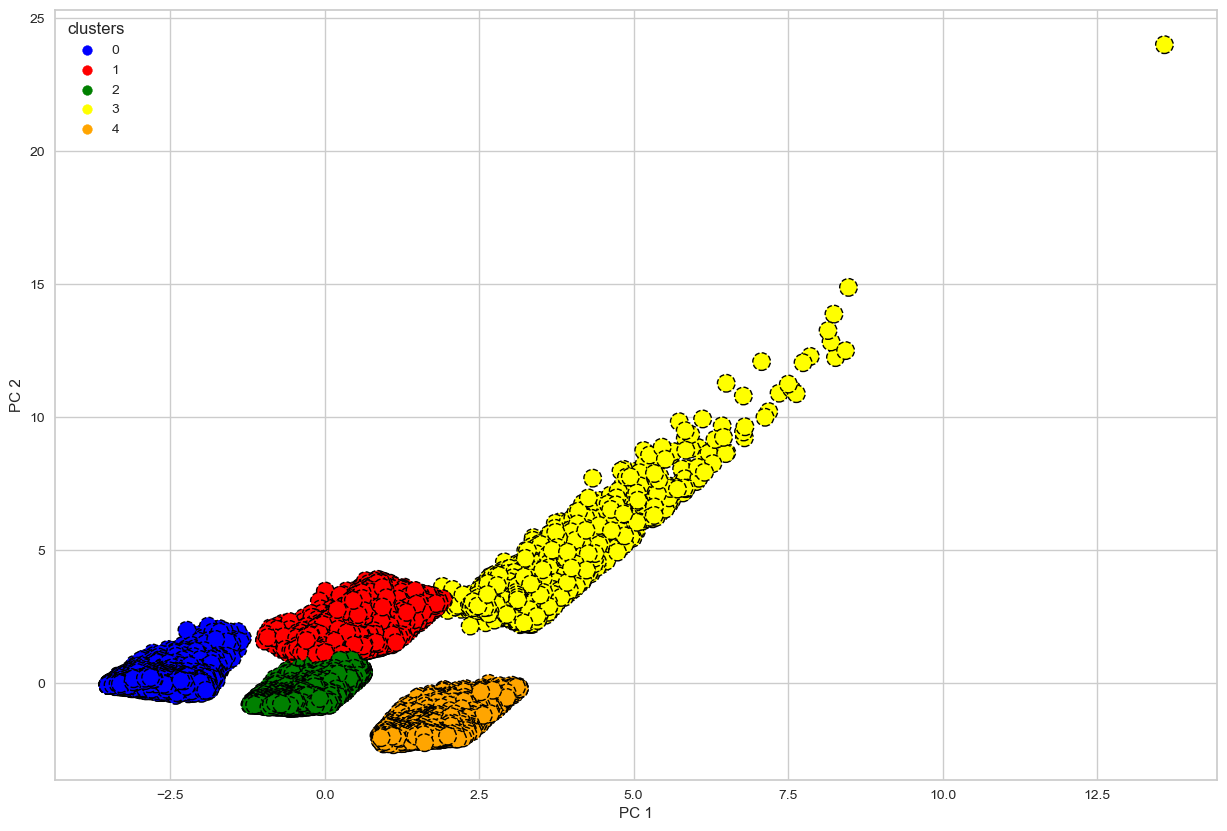

In [71]:
#Visualize cluster
fig, ax = plt.subplots(figsize=(15, 10))

sns.scatterplot(
    x="PC 1", y="PC 2",
    hue="clusters",
    edgecolor='black',
    linestyle='--',
    data=data_pca,
    palette=['blue','red','green','yellow', 'orange'],
    s=160,
    ax=ax
)

# Cluster Interpretation and Business Recommendation

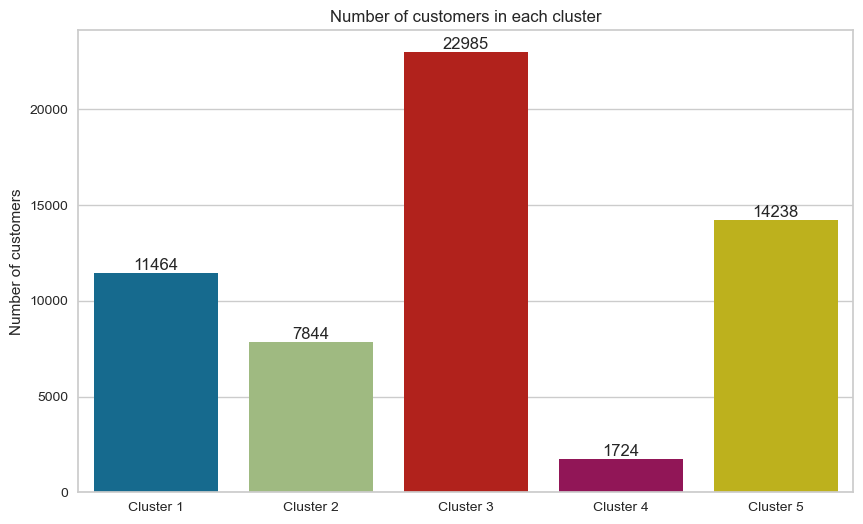

In [72]:
#Check count of each clusters

plt.figure(figsize=(10,6))
ax = sns.countplot(x=df_model['clusters'])
ax.bar_label(ax.containers[0])  #to display count
plt.xticks([0,1,2,3,4], ['Cluster 1', 'Cluster 2', 'Cluster 3', 'Cluster 4', 'Cluster 5'])
plt.title("Number of customers in each cluster")
plt.xlabel("")
plt.ylabel("Number of customers")
plt.show()

In [74]:
#See original dataframe grouped with cluster aggregated by mean and median

display(df[df_model.columns].groupby('clusters').agg(['mean']))

loyalty last_to_end flight_count    seg_km_sum
               mean        mean         mean          mean
clusters                                                  
0         38.360581  479.810537     3.887474   5997.533583
1         55.756792   41.663947    29.836945  42733.772310
2         28.492884  105.689276     8.090189  11470.855297
3         68.378648   18.037123    66.770882  97266.556845
4         80.534610  118.608934     8.661820  12332.805169

## Contextual description of what kind of customers exist in each cluster

- **Cluster 0**: Customers that recently became a member, have highest time difference between their last flight and last order, a lowest average number of flights, and the lowest total distance flown
- **Cluster 1**: Customers that became a member for quite some time, have low time difference between their last flight and last order, a really high average number of flights, and high total distance flown
- **Cluster 2**: Customers that recently became a member, have medium time difference between their last flight and last order, a low average number of flights, and a medium total distance flown
- **Cluster 3**: Customers that became a member for quite some time, have the lowest time difference between their last flight and last order, the highest average number of flights, and highest total distance flown
- **Cluster 4**: Customers that became a member the longest, have the medium time difference between their last flight and last order, a low average number of flights, a medium total distance flown

## Business Recommendation For Each Cluster

In general, the following two recommendations can be made:
1. Create specific campaigns for each customer segment, as each segment exhibits different behavioral patterns.
2. Follow up on the reactions from each segment regarding the campaigns/treatments conducted to continuously improve the services for each segment.

Specific recommendations for each cluster are as follows:

**Cluster 0: New Explorers**
- *Recommendation:* Since these customers recently became members and have the highest time difference between their last flight and last order, consider implementing targeted marketing campaigns to encourage them to book more flights. Offer promotions or discounts to incentivize their next booking.

**Cluster 1: Elite Travelers**
- *Recommendation:* Focus on customer loyalty programs and exclusive benefits for this cluster, as they have been members for a significant amount of time and show a high level of engagement. Offer personalized rewards, premium services, or early access to promotions to maintain their loyalty.

**Cluster 2: Engagement Seekers**
- *Recommendation:* Target this cluster with campaigns to increase their engagement, as they recently became members and have a medium time difference between their last flight and last order. Provide them with personalized offers to encourage more frequent bookings and build a stronger connection with the airline.

**Cluster 3: Seasoned Jetsetters**
- *Recommendation:* Since these customers have been members for quite some time, have a low time difference between their last flight and last order, and exhibit a high level of engagement, focus on providing them with premium services and personalized experiences. Offer exclusive deals, upgrades, or priority services to enhance their loyalty.

**Cluster 4: Rediscovery Nomads**
- *Recommendation:* Given that these customers have been members for the longest time and have a medium time difference between their last flight and last order, consider launching campaigns to re-engage them. Provide special offers, introduce new services, or showcase the latest features to reignite their interest in the airline.